# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

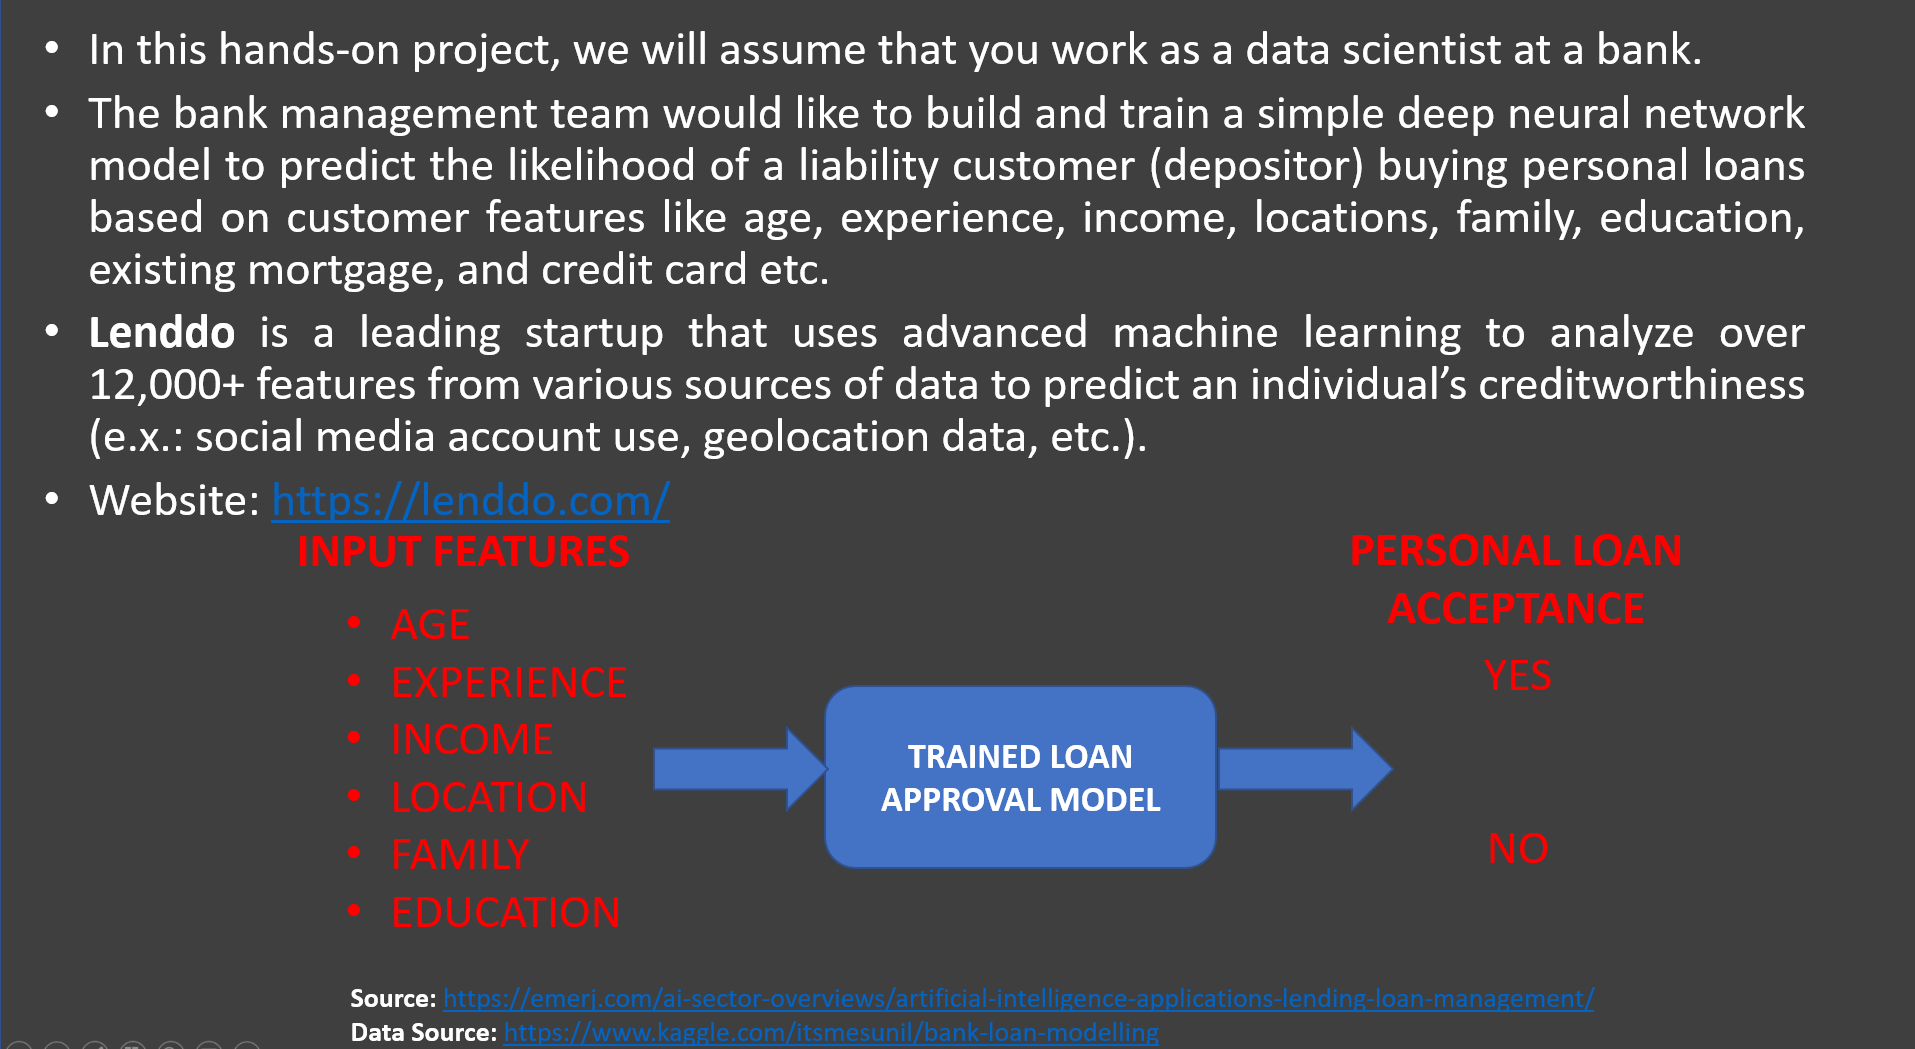

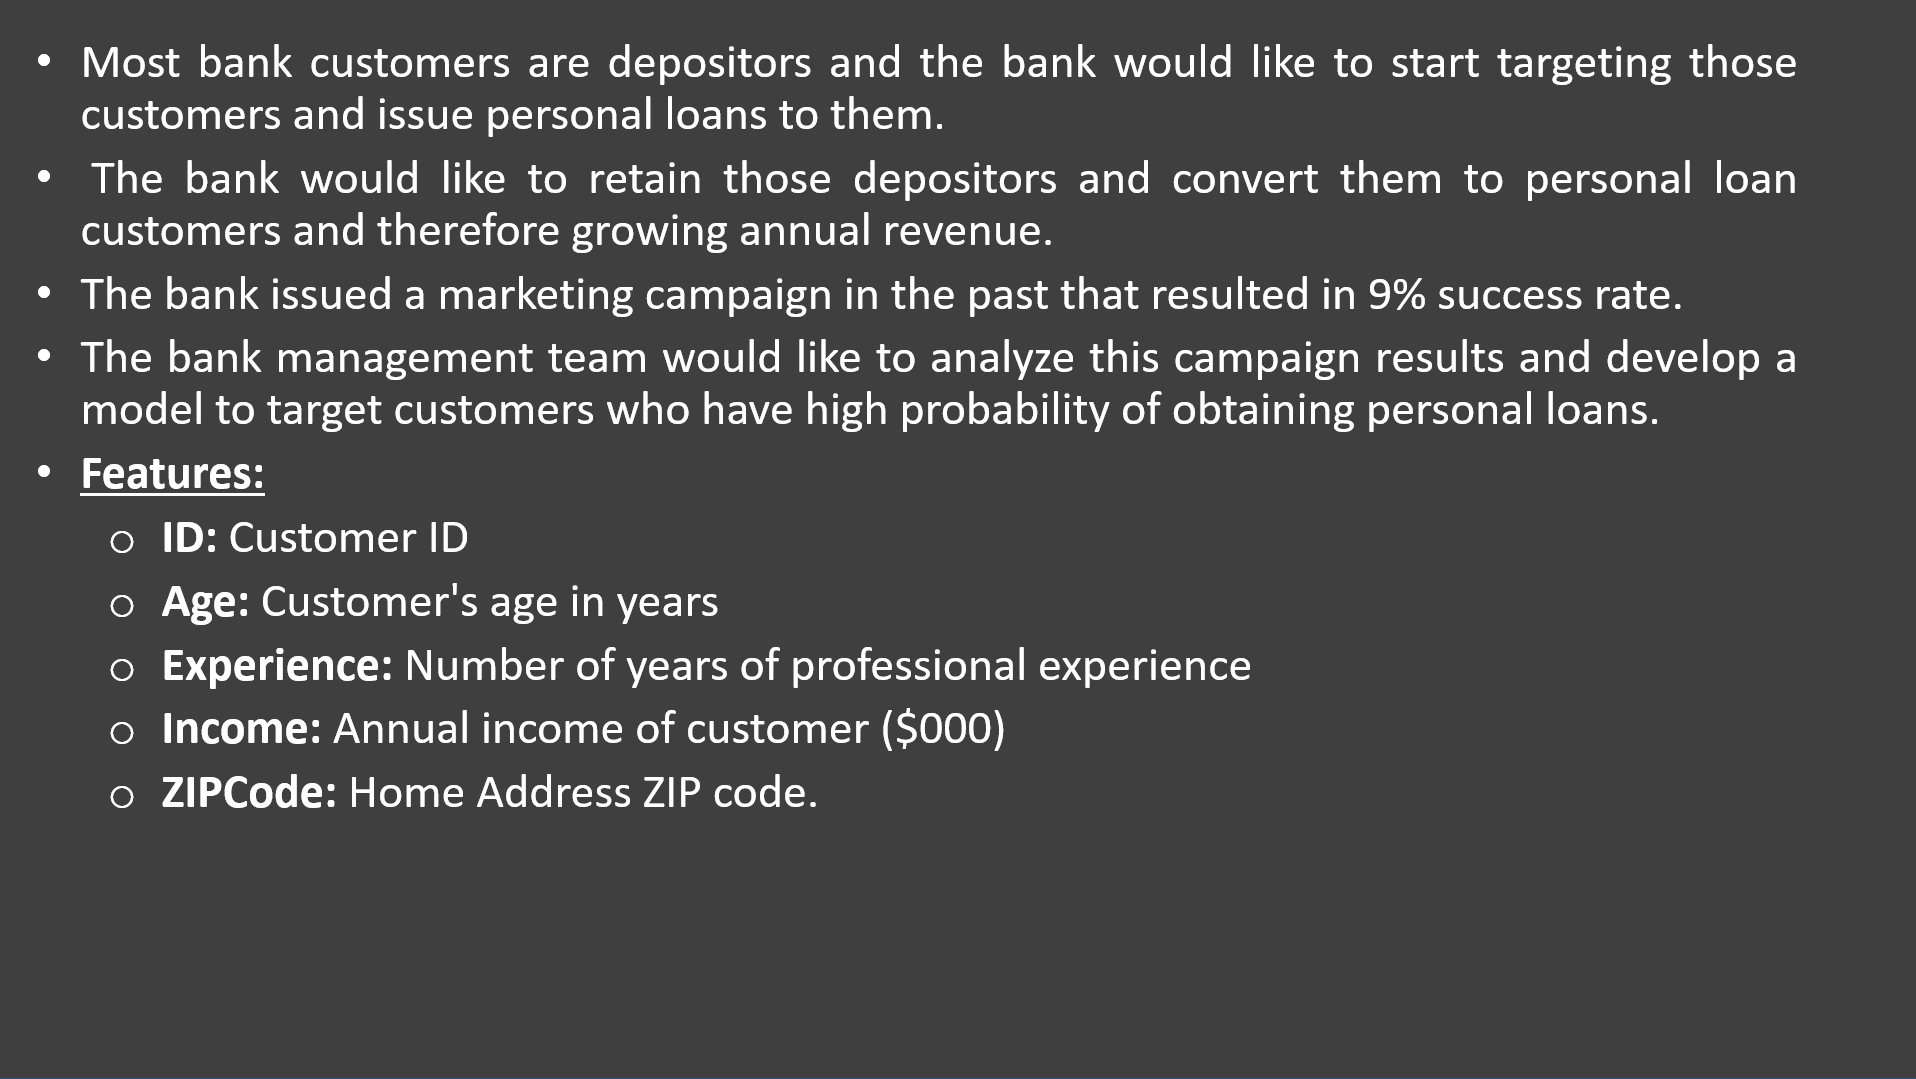

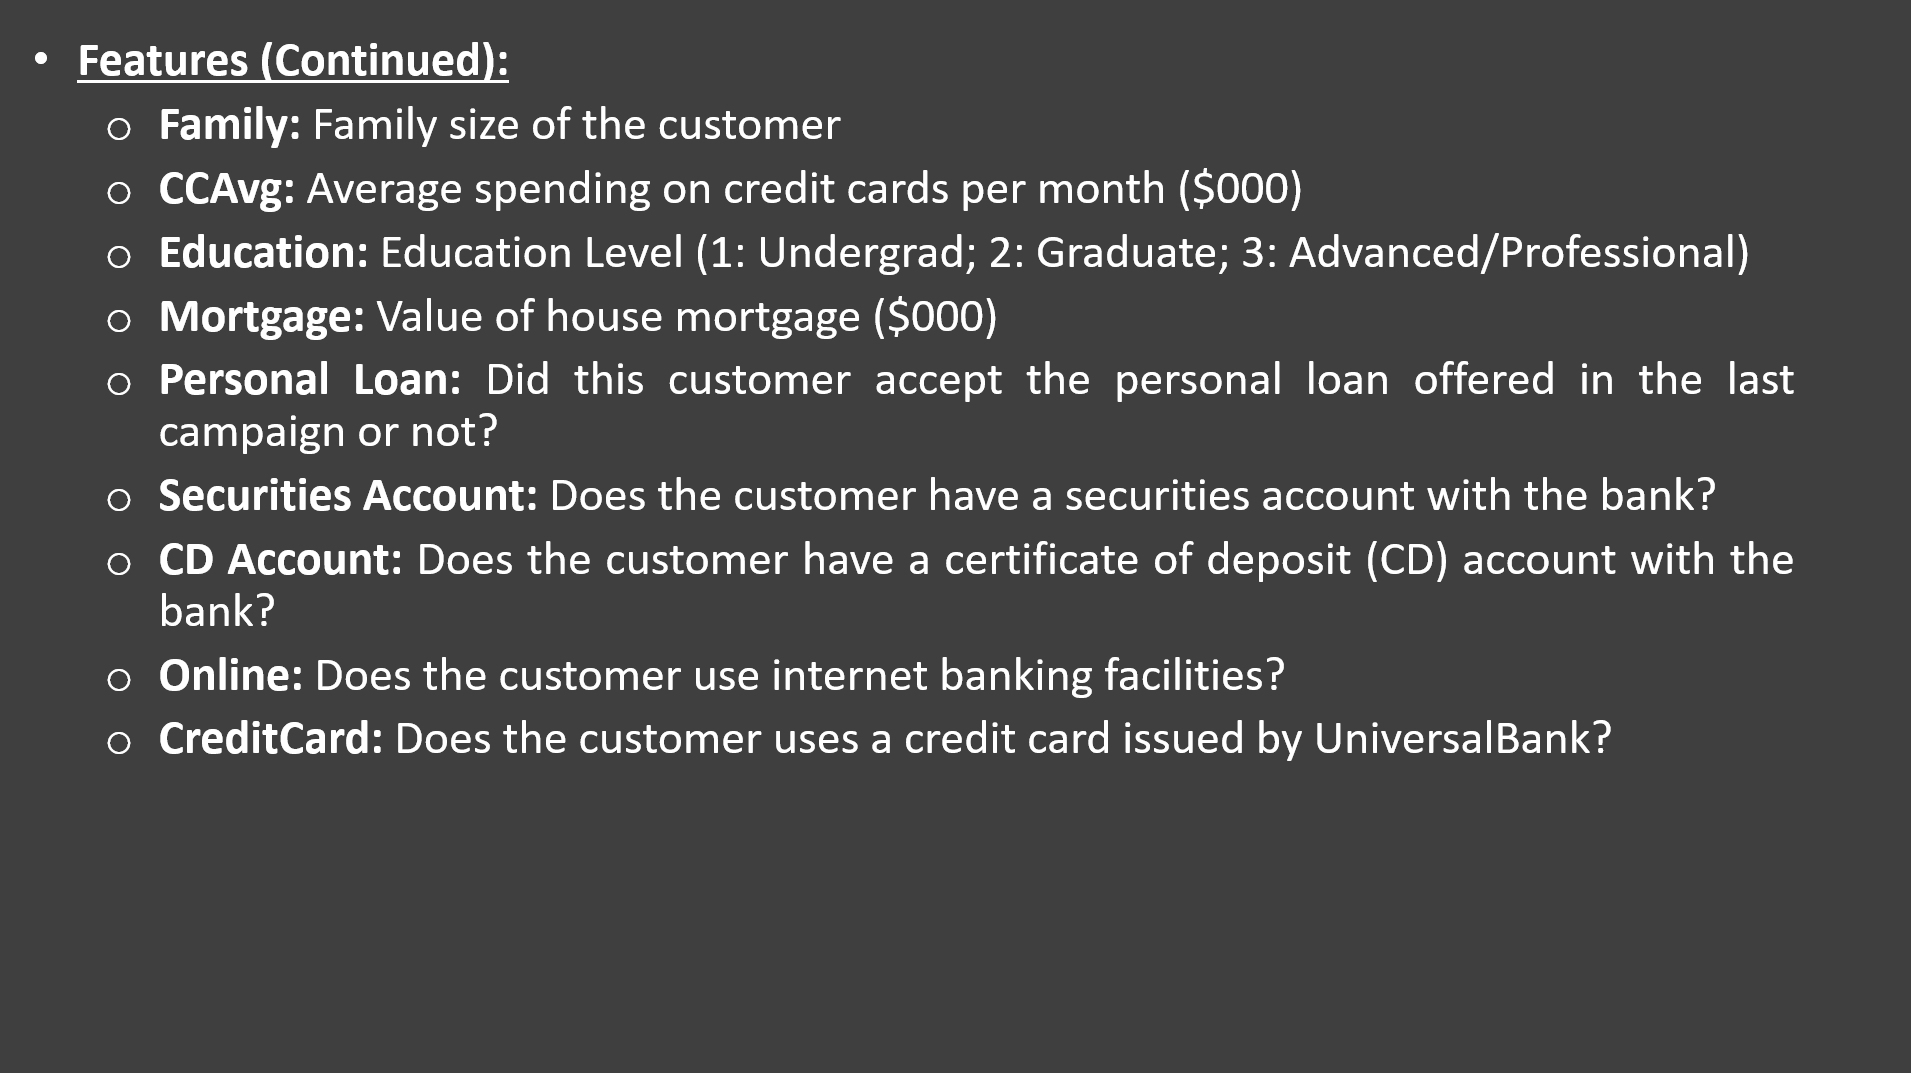

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [3]:
# Visualize dataset
bank_df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          10      81     90089       3   0.60          2   
9       10   34           9     180     93023       1   8.90          3   
10      11   65          39     105     94710       4   2.40          3   
11      12   29           5      45     90277       3   0.10          2   
12      13   48          23     114     93106       2   3.80          3   
13      14   59          32      40     94920       4   2.50          2   
14      15   67          41     112     91741       1   2.00          1   
15      16   60          30      22     95054       1   1.50          3   
16      17   38          14     130     95010       4   4.70          3   
17      18   42          18      81     94305       4   2.40          1   
18      19   46          21     193     91604       2   8.10          3   
19      20   55          28      21     94720       1   0.50          2   
20      21   56          31      25     94015       4   0.90          2   
21      22   57          27      63     90095       3   2.00          3   
22      23   29           5      62     90277       1   1.20          1   
23      24   44          18      43     91320       2   0.70          1   
24      25   36          11     152     95521       2   3.90          1   
25      26   43          19      29     94305       3   0.50          1   
26      27   40          16      83     95064       4   0.20          3   
27      28   46          20     158     90064       1   2.40          1   
28      29   56          30      48     94539       1   2.20          3   
29      30   38          13     119     94104       1   3.30          2   
30      31   59          35      35     93106       1   1.20          3   
31      32   40          16      29     94117       1   2.00          2   
32      33   53          28      41     94801       2   0.60          3   
33      34   30           6      18     91330       3   0.90          3   
34      35   31           5      50     94035       4   1.80          3   
35      36   48          24      81     92647       3   0.70          1   
36      37   59          35     121     94720       1   2.90          1   
37      38   51          25      71     95814       1   1.40          3   
38      39   42          18     141     94114       3   5.00          3   
39      40   38          13      80     94115       4   0.70          3   
40      41   57          32      84     92672       3   1.60          3   
41      42   34           9      60     94122       3   2.30          1   
42      43   32           7     132     90019       4   1.10          2   
43      44   39          15      45     95616       1   0.70          1   
44      45   46          20     104     94065       1   5.70          1   
45      46   57          31      52     94720       4   2.50          1   
46      47   39          14      43     95014       3   0.70          2   
47      48   37          12     194     91380       4   0.20          3   
48      49   56          26      81     95747       2   4.50          3   
49      50   40          16      49     92373       1   1.80          1   
50      51   32           8       8     92093       4   0.70          2   
51      52   61          37     131     94720       1   2.90          1   
52      53   30           6      

MINI CHALLENGE #1:
- Use bank_df.head() to show the first 10 rows in a dataframe
- Show last 10 rows in the dataframe 
- How many samples are present in the Universal Bank Dataset?


In [4]:
bank_df.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [5]:
bank_df.tail(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4990  4991   55          25      58     95023       4   2.00          3   
4991  4992   51          25      92     91330       1   1.90          2   
4992  4993   30           5      13     90037       4   0.50          3   
4993  4994   45          21     218     91801       2   6.67          1   
4994  4995   64          40      75     94588       3   2.00          3   
4995  4996   29           3      40     92697       1   1.90          3   
4996  4997   30           4      15     92037       4   0.40          1   
4997  4998   63          39      24     93023       2   0.30          3   
4998  4999   65          40      49     90034       3   0.50          2   
4999  5000   28           4      83     92612       3   0.80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [6]:
bank_df['ID'].count()

5000

In [7]:
bank_df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [8]:
bank_df['Age'].unique().shape

(45,)

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [9]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# Obtain the statistical summary of the dataframe
print(bank_df.describe().transpose())

                     count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.

In [11]:
# For better visualization
bank_df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [12]:
# See how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

MINI CHALLENGE #2:
- What is the average age in this dataset?
- What is the % of customers who have credit cards?
- What is the % of customers who accepted the personal loan?


In [13]:
bank_df['Age'].mean()

45.3384

In [14]:
creditcard_customer = bank_df[ bank_df['CreditCard'] == 1]

In [15]:
creditcard_customer

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4        5   35           8      45     91330       4   1.00          2   
7        8   50          24      22     93943       1   0.30          3   
15      16   60          30      22     95054       1   1.50          3   
19      20   55          28      21     94720       1   0.50          2   
24      25   36          11     152     95521       2   3.90          1   
27      28   46          20     158     90064       1   2.40          1   
28      29   56          30      48     94539       1   2.20          3   
29      30   38          13     119     94104       1   3.30          2   
36      37   59          35     121     94720       1   2.90          1   
44      45   46          20     104     94065       1   5.70          1   
45      46   57          31      52     94720       4   2.50          1   
47      48   37          12     194     91380       4   0.20          3   
48      49   56          26      81     95747       2   4.50          3   
49      50   40          16      49     92373       1   1.80          1   
65      66   59          35     131     91360       1   3.80          1   
68      69   47          21      60     93407       3   2.10          1   
70      71   42          18     115     91335       1   3.50          1   
72      73   44          20     130     92007       1   5.00          1   
73      74   41          16      85     94606       1   4.00          3   
74      75   28           3     135     94611       2   3.30          1   
75      76   31           7     135     94901       4   3.80          2   
80      81   60          36      41     95134       4   1.30          1   
89      90   25          -1     113     94303       4   2.30          3   
102    103   53          23      44     93555       3   1.00          3   
104    105   56          32      38     93311       4   1.30          1   
106    107   43          17      69     92717       4   2.90          1   
122    123   58          32      73     94523       2   0.70          2   
126    127   31           5     115     92096       2   1.30          1   
129    130   41          16      70     92131       3   0.50          3   
131    132   58          34     149     93720       4   7.20          2   
135    136   58          33      45     93010       4   2.10          1   
138    139   59          34      42     94928       3   1.50          1   
140    141   51          25      31     90245       2   0.40          3   
141    142   35          11      58     95831       3   2.00          1   
142    143   33           9      48     91770       1   2.10          3   
143    144   25           1      54     94117       4   1.60          1   
145    146   59          35     124     90007       1   7.40          1   
146    147   46          19      84     94102       1   2.67          2   
150    151   46          22     118     94107       2   7.50          1   
151    152   26           0     132     92834       3   6.50          3   
152    153   57          32      24     93117       1   1.30          1   
153    154   60          36      22     94551       2   1.00          1   
156    157   26           0      15     92131       4   0.40          1   
157    158   41          17      83     94025       4   2.67          1   
158    159   32           6      79     94720       2   1.50          3   
167    168   33           9      23     94305       3   0.90          3   
169    170   27           1     112     90503       4   2.10          3   
173    174   58          34      42     90095       4   1.50          1   
178    179   53          29      24     95818       4   0.20          1   
186    187   48          23      45     95616       1   0.30          1   
193    194   48          24      21     93118       4   0.60          1   
196    197   48          24     165     93407       1   5.00          1   
199    200   36          11     1

In [16]:
CC_customers_percent = len(creditcard_customer)/len(bank_df)*100
print('Precentage of customers who have credit cards with Universal Bank = '+ str(CC_customers_percent) +'%')

Precentage of customers who have credit cards with Universal Bank = 29.4%


In [17]:
PersonalLoan_customer = bank_df[ bank_df['Personal Loan'] == 1]
PersonalLoan_customer

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
9       10   34           9     180     93023       1   8.90          3   
16      17   38          14     130     95010       4   4.70          3   
18      19   46          21     193     91604       2   8.10          3   
29      30   38          13     119     94104       1   3.30          2   
38      39   42          18     141     94114       3   5.00          3   
42      43   32           7     132     90019       4   1.10          2   
47      48   37          12     194     91380       4   0.20          3   
53      54   50          26     190     90245       3   2.10          3   
57      58   56          31     131     95616       2   1.20          3   
75      76   31           7     135     94901       4   3.80          2   
78      79   54          30     133     93305       2   2.60          3   
90      91   55          30     118     90277       4   5.60          2   
131    132   58          34     149     93720       4   7.20          2   
151    152   26           0     132     92834       3   6.50          3   
160    161   29           0     134     95819       4   6.50          3   
174    175   42          17     168     95503       2   7.90          2   
183    184   29           3     148     92173       3   4.10          1   
187    188   46          21     159     94305       3   1.90          3   
199    200   36          11     158     92152       1   5.10          3   
209    210   64          39     172     94707       4   3.10          1   
243    244   65          39     170     90095       3   7.90          3   
247    248   53          29     120     92626       4   2.70          2   
251    252   54          28     170     92182       2   6.20          2   
254    255   65          41     134     91942       3   3.90          3   
261    262   42          16     111     93106       2   1.20          3   
288    289   44          19     172     94306       2   4.30          3   
299    300   41          15     159     90057       1   5.50          3   
303    304   49          25     195     95605       4   3.00          1   
316    317   57          31     165     95054       1   1.60          2   
317    318   40          16     119     91335       2   4.20          2   
321    322   44          20     101     92717       3   4.40          2   
322    323   63          39     101     92007       1   3.90          1   
323    324   59          34      99     90034       1   4.40          1   
324    325   56          30     158     90089       4   6.10          1   
348    349   40          15     173     95060       4   6.60          1   
349    350   26           2      60     93407       2   3.00          1   
351    352   28           4     155     92182       4   5.30          2   
365    366   57          32     174     90089       1   6.80          2   
382    383   65          41     133     94904       4   2.00          1   
388    389   54          30     100     95814       4   3.40          3   
400    401   36          10     179     94542       3   6.60          1   
421    422   28           3     115     92333       4   3.10          2   
438    439   58          32     113     93943       2   3.80          2   
442    443   58          28     122     95136       1   3.00          3   
462    463   29           4     183     91423       3   8.30          3   
463    464   48          22     149     94928       2   5.50          2   
464    465   43          19      83     94305       4   3.60          3   
473    474   64          39     182     93955       1   1.20          2   
475    476   43          19     152     92008       3   6.10          2   
482    483   56          32     173     94022       1   4.60          2   
505    506   36          12      69     94305       3   3.10          2   
528    529   64          39     122     90089       4   0.20          1   
537    538   44          20     1

In [18]:
PersonalLoan_customer_percent = len(PersonalLoan_customer)/len(bank_df)*100
print('Precentage of customers who have Personal Loan with Universal Bank = '+ str(PersonalLoan_customer_percent) +'%')

Precentage of customers who have Personal Loan with Universal Bank = 9.6%


# TASK #4: PERFORM DATA VISUALIZATION

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

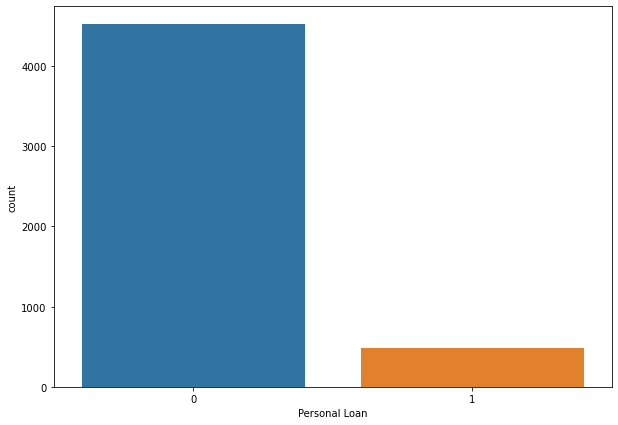

In [19]:
# Visualize personal Loan column 
# Percentage of customers who accepted personal loan ~ 9%
plt.figure(figsize=(10,7))
sns.countplot(bank_df['Personal Loan'])

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

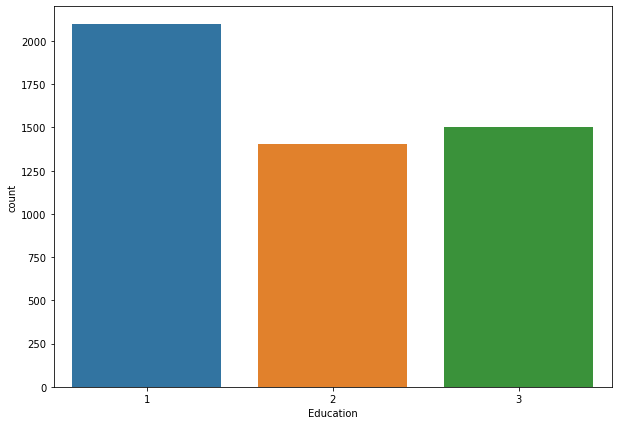

In [20]:
# Visualize Education feature
plt.figure(figsize=(10,7))
sns.countplot(bank_df['Education'])

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

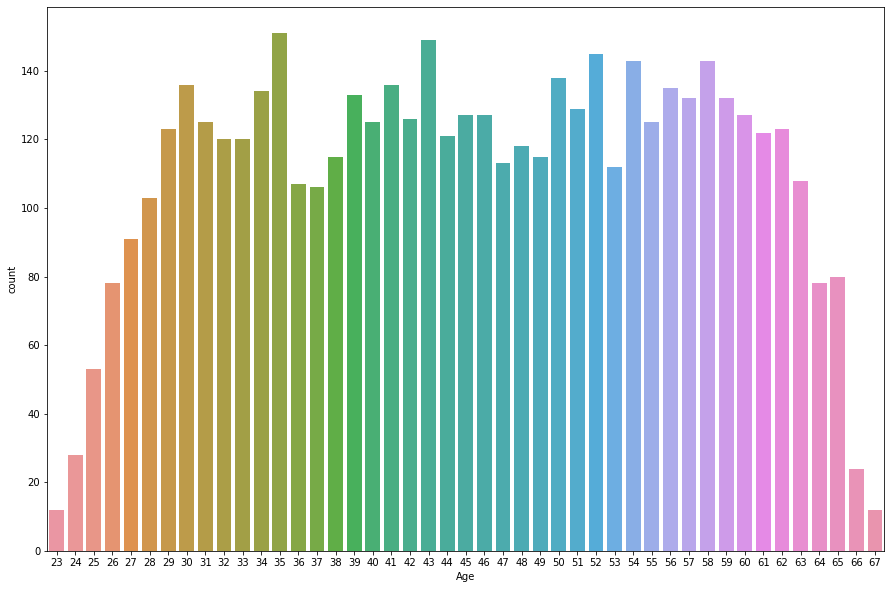

In [21]:
# Visualize Age
# Uniform distribution between 30-60 years
plt.figure(figsize=(15,10))
sns.countplot(bank_df['Age'])

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

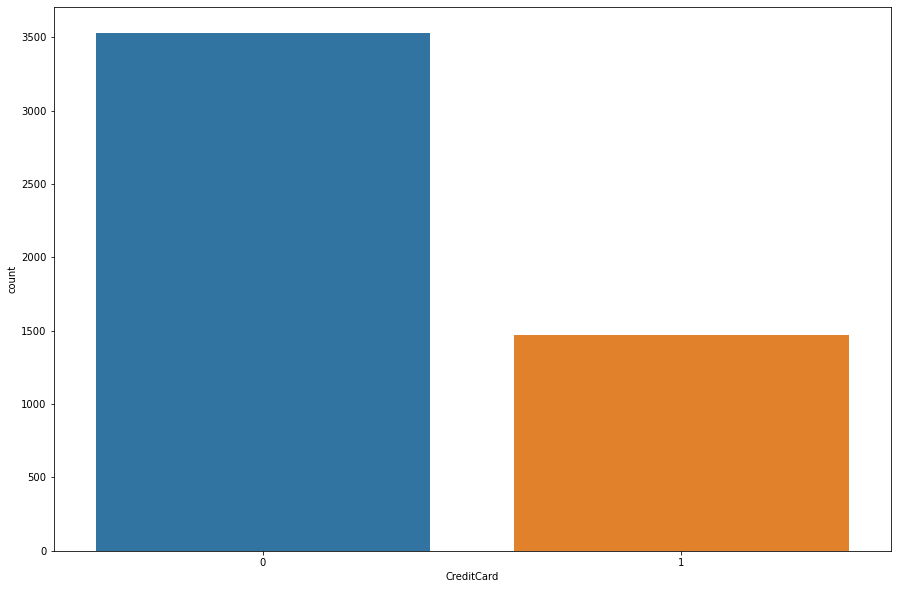

In [22]:
# Visualize credit card availability feature
# Recall that ~29% of customers have credit cards
plt.figure(figsize=(15,10))
sns.countplot(bank_df['CreditCard'])

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

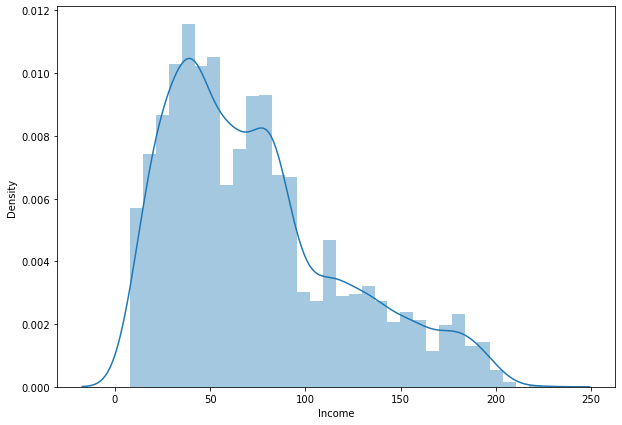

In [23]:
# Visualize income data
# Most customers have incomes that range between 45K and 60K per year
# Data is skewed with less customers earning above 100K
plt.figure(figsize=(10,7))
sns.distplot(bank_df['Income'])

In [24]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [25]:
personalloans

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
9       10   34           9     180     93023       1   8.90          3   
16      17   38          14     130     95010       4   4.70          3   
18      19   46          21     193     91604       2   8.10          3   
29      30   38          13     119     94104       1   3.30          2   
38      39   42          18     141     94114       3   5.00          3   
42      43   32           7     132     90019       4   1.10          2   
47      48   37          12     194     91380       4   0.20          3   
53      54   50          26     190     90245       3   2.10          3   
57      58   56          31     131     95616       2   1.20          3   
75      76   31           7     135     94901       4   3.80          2   
78      79   54          30     133     93305       2   2.60          3   
90      91   55          30     118     90277       4   5.60          2   
131    132   58          34     149     93720       4   7.20          2   
151    152   26           0     132     92834       3   6.50          3   
160    161   29           0     134     95819       4   6.50          3   
174    175   42          17     168     95503       2   7.90          2   
183    184   29           3     148     92173       3   4.10          1   
187    188   46          21     159     94305       3   1.90          3   
199    200   36          11     158     92152       1   5.10          3   
209    210   64          39     172     94707       4   3.10          1   
243    244   65          39     170     90095       3   7.90          3   
247    248   53          29     120     92626       4   2.70          2   
251    252   54          28     170     92182       2   6.20          2   
254    255   65          41     134     91942       3   3.90          3   
261    262   42          16     111     93106       2   1.20          3   
288    289   44          19     172     94306       2   4.30          3   
299    300   41          15     159     90057       1   5.50          3   
303    304   49          25     195     95605       4   3.00          1   
316    317   57          31     165     95054       1   1.60          2   
317    318   40          16     119     91335       2   4.20          2   
321    322   44          20     101     92717       3   4.40          2   
322    323   63          39     101     92007       1   3.90          1   
323    324   59          34      99     90034       1   4.40          1   
324    325   56          30     158     90089       4   6.10          1   
348    349   40          15     173     95060       4   6.60          1   
349    350   26           2      60     93407       2   3.00          1   
351    352   28           4     155     92182       4   5.30          2   
365    366   57          32     174     90089       1   6.80          2   
382    383   65          41     133     94904       4   2.00          1   
388    389   54          30     100     95814       4   3.40          3   
400    401   36          10     179     94542       3   6.60          1   
421    422   28           3     115     92333       4   3.10          2   
438    439   58          32     113     93943       2   3.80          2   
442    443   58          28     122     95136       1   3.00          3   
462    463   29           4     183     91423       3   8.30          3   
463    464   48          22     149     94928       2   5.50          2   
464    465   43          19      83     94305       4   3.60          3   
473    474   64          39     182     93955       1   1.20          2   
475    476   43          19     152     92008       3   6.10          2   
482    483   56          32     173     94022       1   4.60          2   
505    506   36          12      69     94305       3   3.10          2   
528    529   64          39     122     90089       4   0.20          1   
537    538   44          20     1

In [26]:
# Mean income of customers who have personal loans is generally high ~ 144K and average CC of 3.9K
personalloans.describe()

ID         Age  Experience      Income      ZIP Code  \
count   480.000000  480.000000  480.000000  480.000000    480.000000   
mean   2390.650000   45.066667   19.843750  144.745833  93153.202083   
std    1394.393674   11.590964   11.582443   31.584429   1759.223753   
min      10.000000   26.000000    0.000000   60.000000  90016.000000   
25%    1166.500000   35.000000    9.000000  122.000000  91908.750000   
50%    2342.000000   45.000000   20.000000  142.500000  93407.000000   
75%    3566.000000   55.000000   30.000000  172.000000  94705.500000   
max    4981.000000   65.000000   41.000000  203.000000  96008.000000   

           Family       CCAvg   Education    Mortgage  Personal Loan  \
count  480.000000  480.000000  480.000000  480.000000          480.0   
mean     2.612500    3.905354    2.233333  100.845833            1.0   
std      1.115393    2.097681    0.753373  160.847862            0.0   
min      1.000000    0.000000    1.000000    0.000000            1.0   
25%      2.000000    2.600000    2.000000    0.000000            1.0   
50%      3.000000    3.800000    2.000000    0.000000            1.0   
75%      4.000000    5.347500    3.000000  192.500000            1.0   
max      4.000000   10.000000    3.000000  617.000000            1.0   

       Securities Account  CD Account     Online  CreditCard  
count          480.000000  480.000000  480.00000  480.000000  
mean             0.125000    0.291667    0.60625    0.297917  
std              0.331064    0.455004    0.48909    0.457820  
min              0.000000    0.000000    0.00000    0.000000  
25%              0.000000    0.000000    0.00000    0.000000  
50%              0.000000    0.000000    1.00000    0.000000  
75%              0.000000    1.000000    1.00000    1.000000  
max              1.000000    1.000000    1.00000    1.000000

In [27]:
no_personalloans

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          10      81     90089       3   0.60          2   
10      11   65          39     105     94710       4   2.40          3   
11      12   29           5      45     90277       3   0.10          2   
12      13   48          23     114     93106       2   3.80          3   
13      14   59          32      40     94920       4   2.50          2   
14      15   67          41     112     91741       1   2.00          1   
15      16   60          30      22     95054       1   1.50          3   
17      18   42          18      81     94305       4   2.40          1   
19      20   55          28      21     94720       1   0.50          2   
20      21   56          31      25     94015       4   0.90          2   
21      22   57          27      63     90095       3   2.00          3   
22      23   29           5      62     90277       1   1.20          1   
23      24   44          18      43     91320       2   0.70          1   
24      25   36          11     152     95521       2   3.90          1   
25      26   43          19      29     94305       3   0.50          1   
26      27   40          16      83     95064       4   0.20          3   
27      28   46          20     158     90064       1   2.40          1   
28      29   56          30      48     94539       1   2.20          3   
30      31   59          35      35     93106       1   1.20          3   
31      32   40          16      29     94117       1   2.00          2   
32      33   53          28      41     94801       2   0.60          3   
33      34   30           6      18     91330       3   0.90          3   
34      35   31           5      50     94035       4   1.80          3   
35      36   48          24      81     92647       3   0.70          1   
36      37   59          35     121     94720       1   2.90          1   
37      38   51          25      71     95814       1   1.40          3   
39      40   38          13      80     94115       4   0.70          3   
40      41   57          32      84     92672       3   1.60          3   
41      42   34           9      60     94122       3   2.30          1   
43      44   39          15      45     95616       1   0.70          1   
44      45   46          20     104     94065       1   5.70          1   
45      46   57          31      52     94720       4   2.50          1   
46      47   39          14      43     95014       3   0.70          2   
48      49   56          26      81     95747       2   4.50          3   
49      50   40          16      49     92373       1   1.80          1   
50      51   32           8       8     92093       4   0.70          2   
51      52   61          37     131     94720       1   2.90          1   
52      53   30           6      72     94005       1   0.10          1   
54      55   29           5      44     95819       1   0.20          3   
55      56   41          17     139     94022       2   8.00          1   
56      57   55          30      29     94005       3   0.10          2   
58      59   28           2      93     94065       2   0.20          1   
59      60   31           5     188     91320       2   4.50          1   
60      61   49          24      39     90404       3   1.70          2   
61      62   47          21     1

In [28]:
# Mean income of customers who have do not have personal loans is generally low ~ 66K and average CC of 1.7K
no_personalloans.describe()

ID          Age   Experience       Income      ZIP Code  \
count  4520.000000  4520.000000  4520.000000  4520.000000   4520.000000   
mean   2512.165487    45.367257    20.132301    66.237389  93152.428761   
std    1448.299331    11.450427    11.456672    40.578534   2156.949654   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1259.750000    35.000000    10.000000    35.000000  91911.000000   
50%    2518.500000    45.000000    20.000000    59.000000  93437.000000   
75%    3768.250000    55.000000    30.000000    84.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  4520.000000  4520.000000  4520.000000  4520.000000         4520.0   
mean      2.373451     1.729009     1.843584    51.789381            0.0   
std       1.148771     1.567647     0.839975    92.038931            0.0   
min       1.000000     0.000000     1.000000     0.000000            0.0   
25%       1.000000     0.600000     1.000000     0.000000            0.0   
50%       2.000000     1.400000     2.000000     0.000000            0.0   
75%       3.000000     2.300000     3.000000    98.000000            0.0   
max       4.000000     8.800000     3.000000   635.000000            0.0   

       Securities Account   CD Account       Online   CreditCard  
count         4520.000000  4520.000000  4520.000000  4520.000000  
mean             0.102212     0.035841     0.595796     0.293584  
std              0.302961     0.185913     0.490792     0.455454  
min              0.000000     0.000000     0.000000     0.000000  
25%              0.000000     0.000000     0.000000     0.000000  
50%              0.000000     0.000000     1.000000     0.000000  
75%              0.000000     0.000000     1.000000     1.000000  
max              1.000000     1.000000     1.000000     1.000000

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

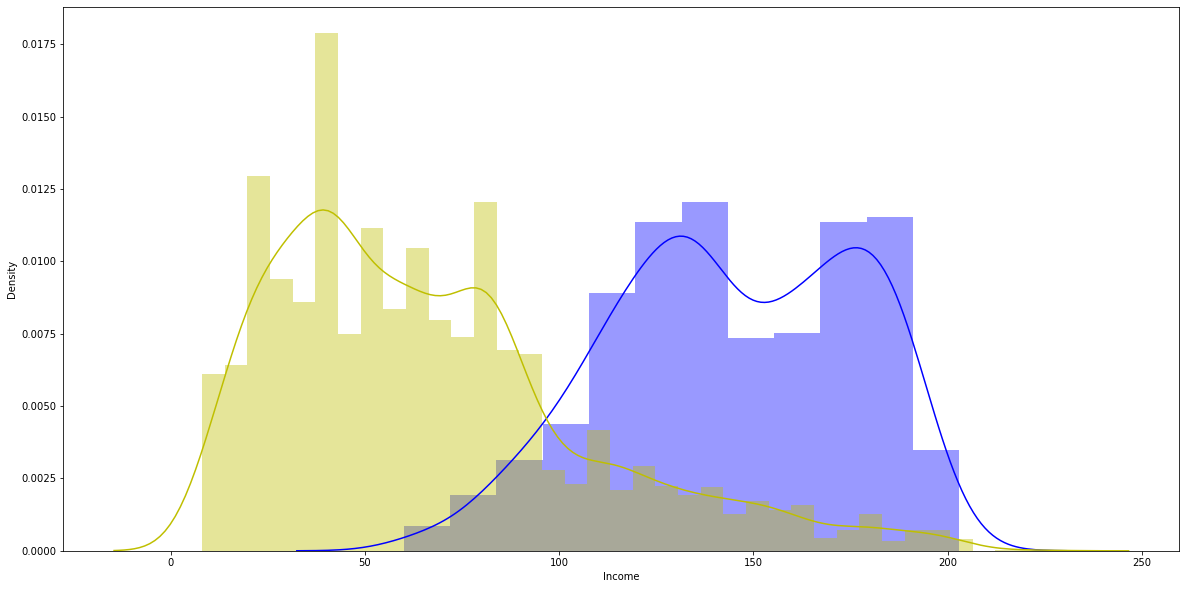

In [29]:
# Plot the distribution plot for both classes separately 
# Customers who took personal loans tend to have higher income
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['Income'], color = 'b')
sns.distplot(no_personalloans['Income'], color='y')

<Figure size 2160x2160 with 0 Axes>

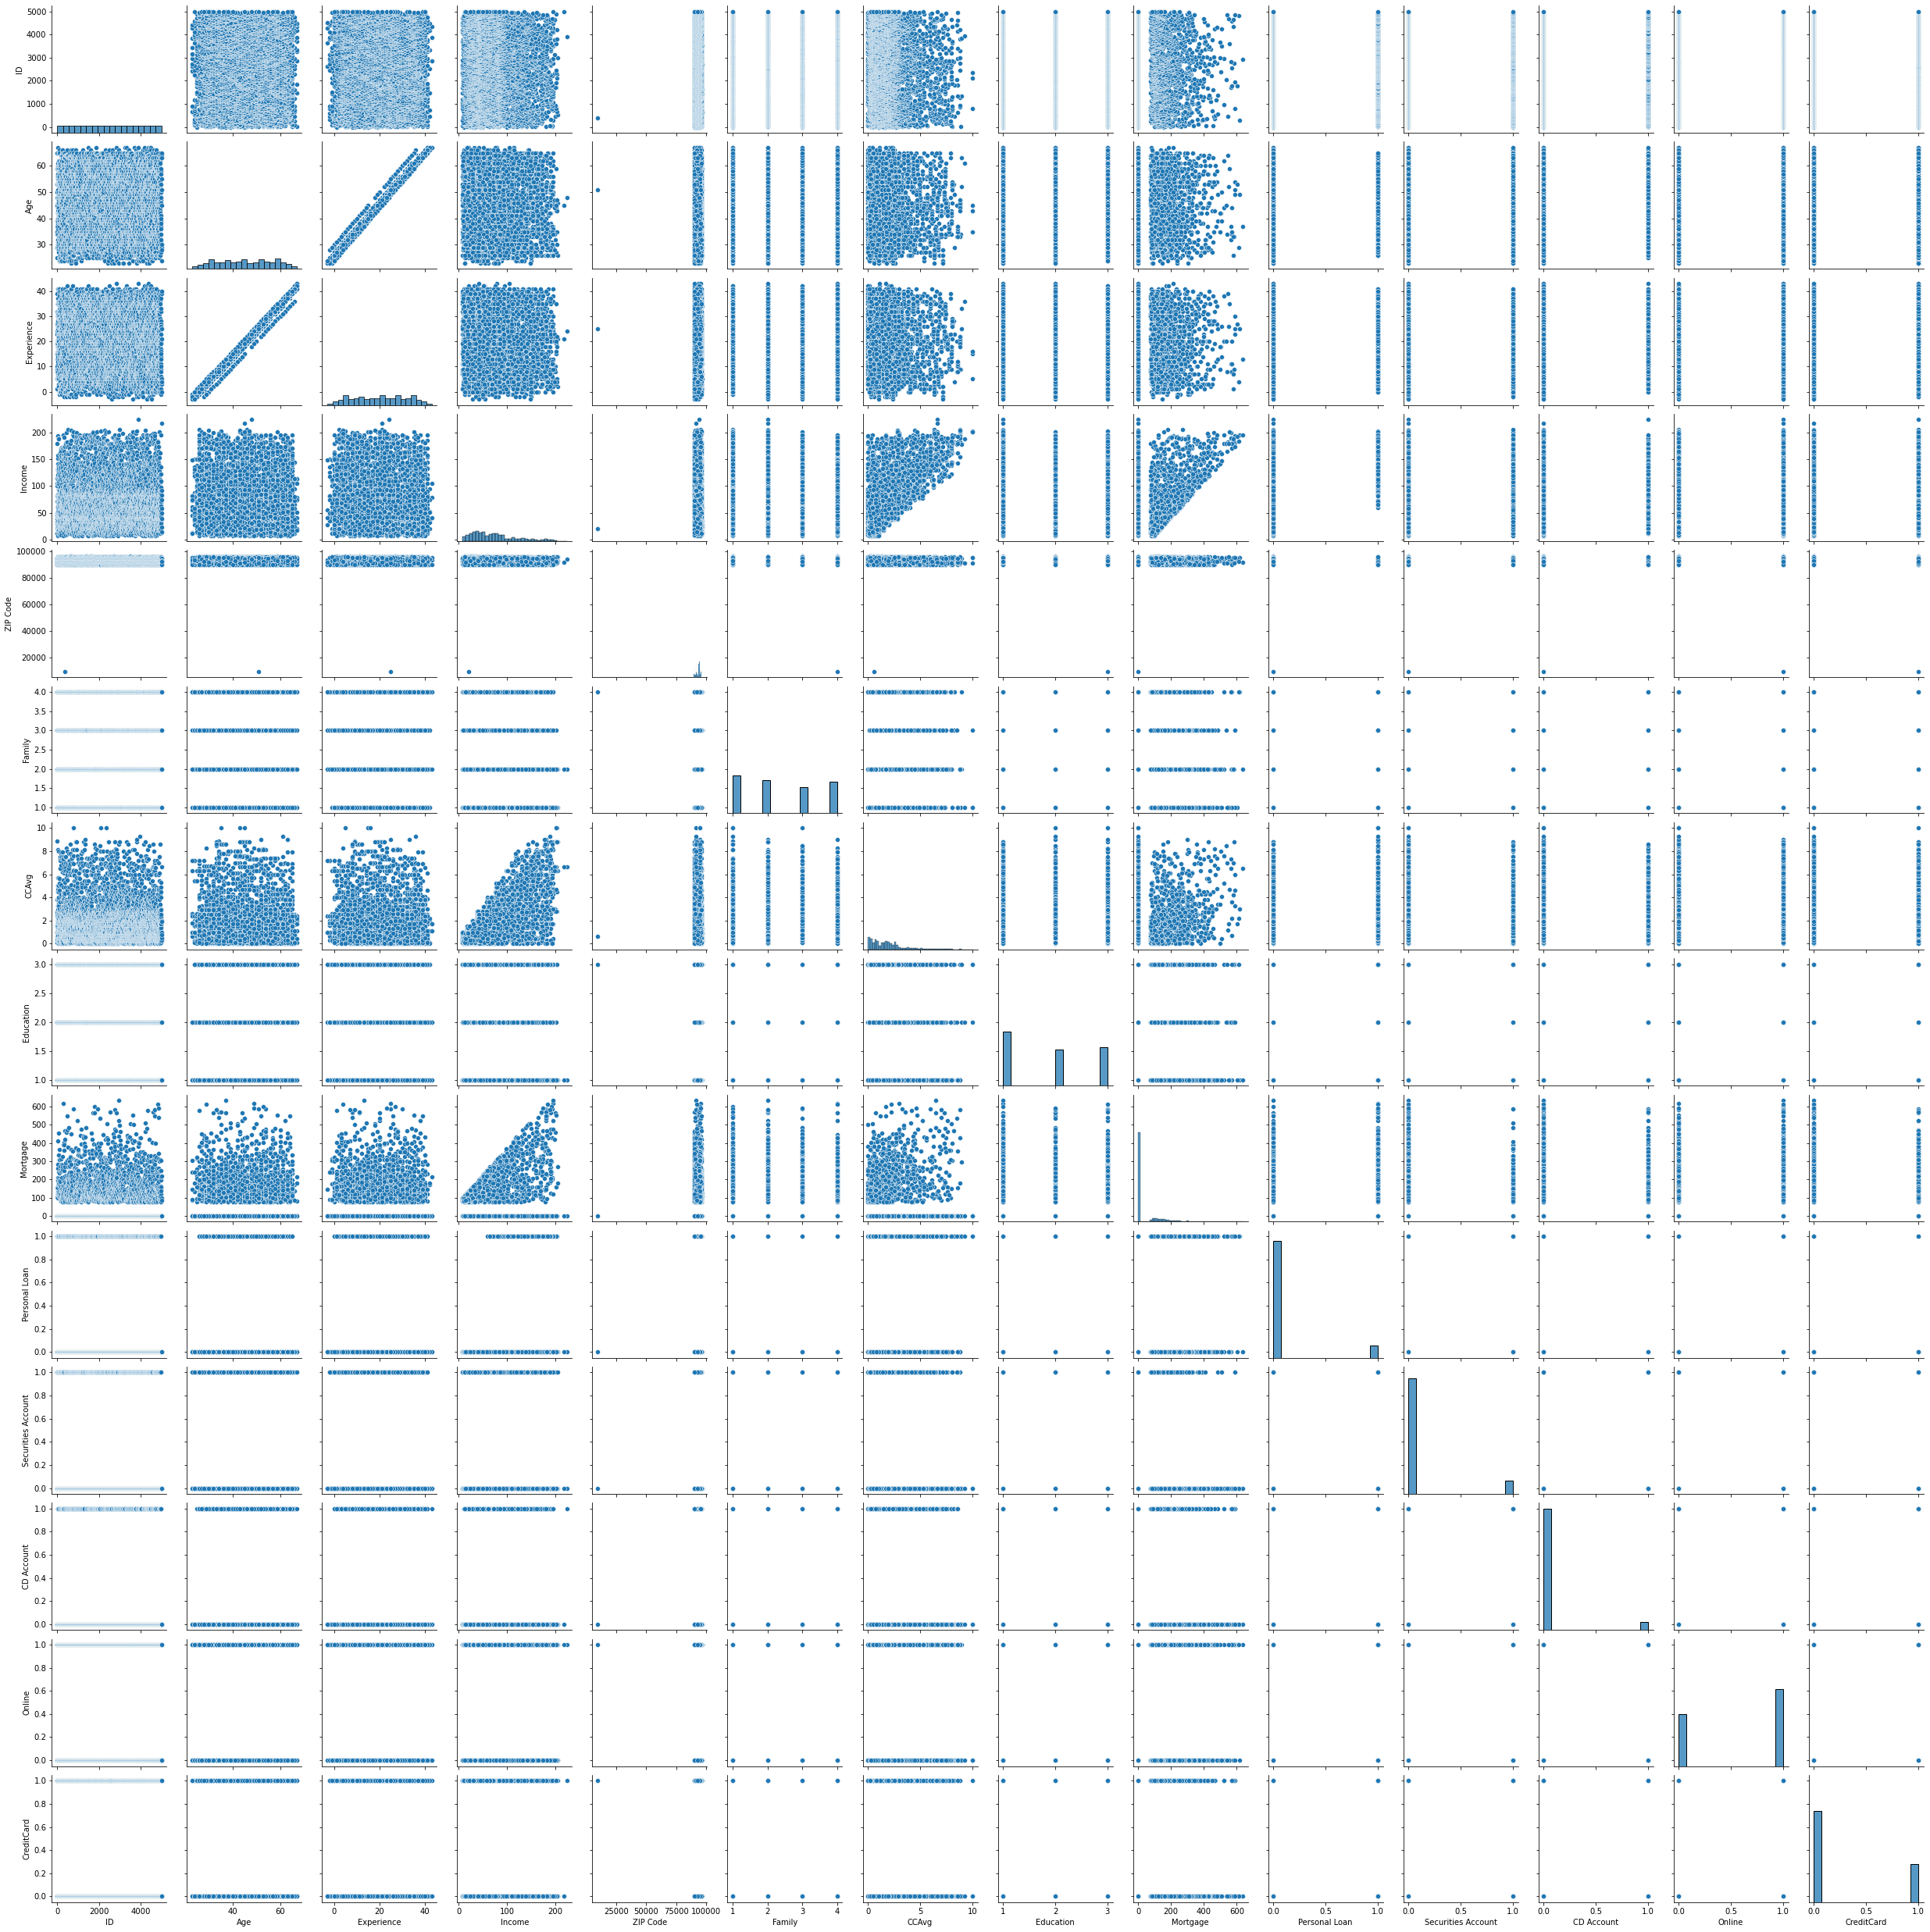

In [30]:
# Plot pairplot
plt.figure(figsize = (30, 30))
sns.pairplot(bank_df)

<AxesSubplot:>

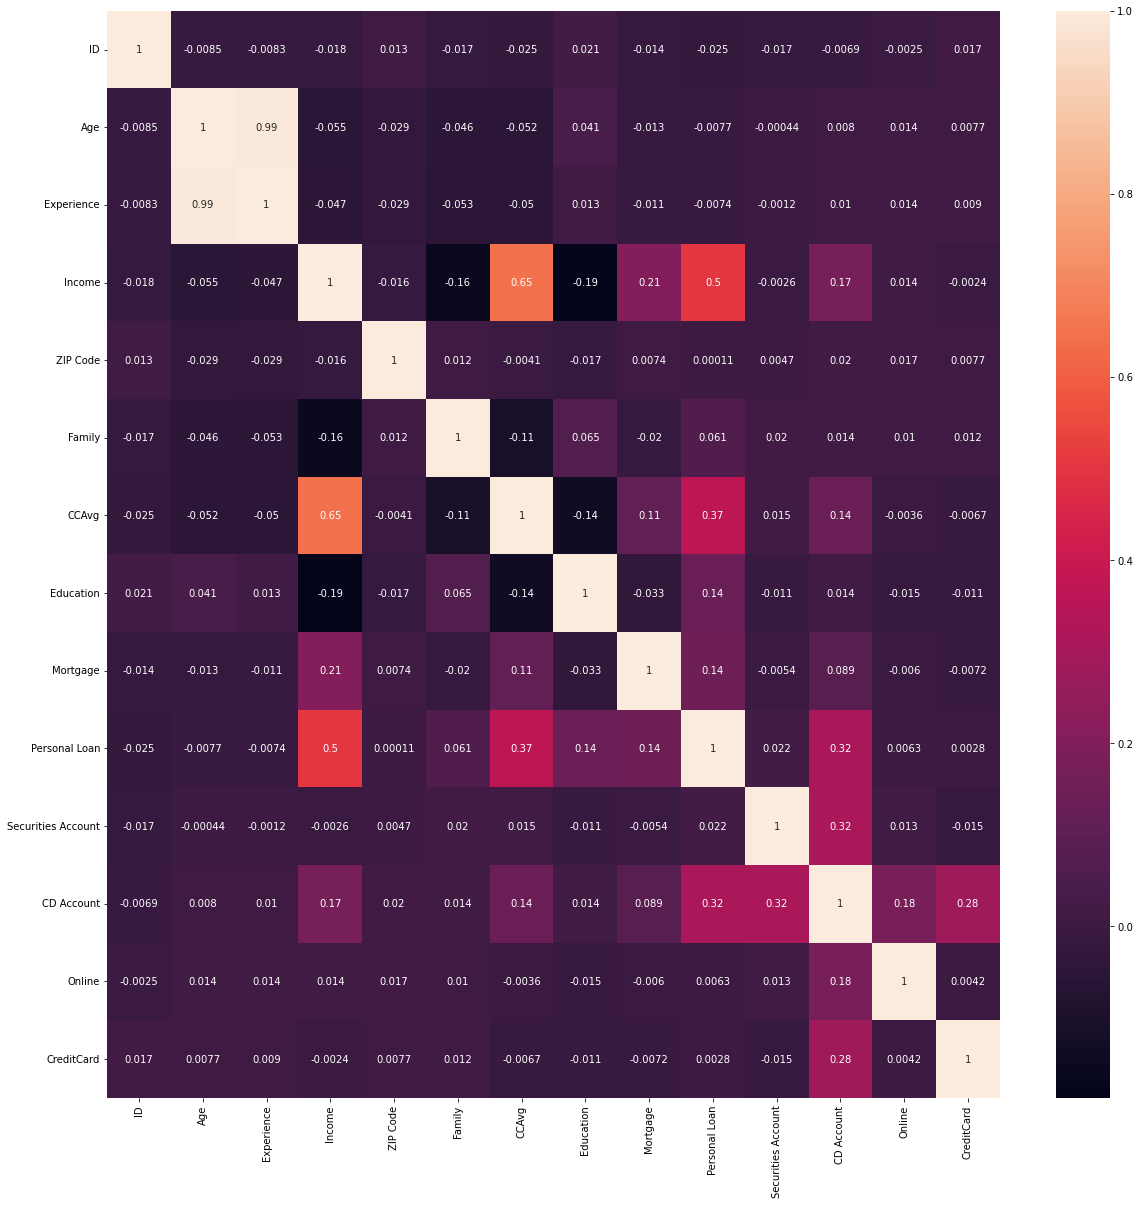

In [31]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))
cm=bank_df.corr()
sns.heatmap(cm, annot = True)

MINI CHALLENGE #3:
- Plot the distribution plot of the Average Credit Card Spending
- Plot the distribution of the average credit spending for each of the classes (personal loans = yes and personal loans = No) 

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

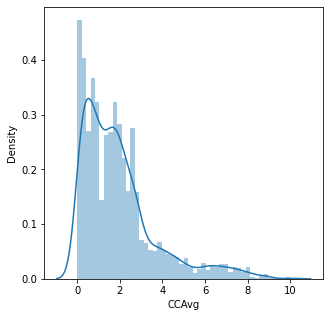

In [32]:
plt.figure(figsize = (5, 5))
sns.distplot(bank_df['CCAvg'])

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

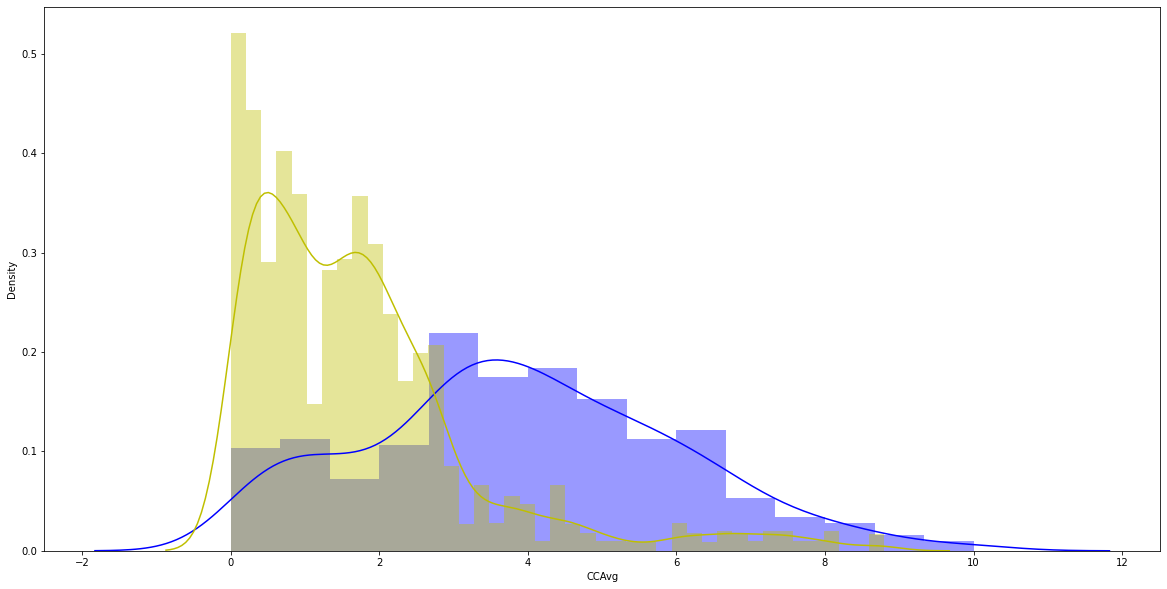

In [33]:
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['CCAvg'], color = 'b')
sns.distplot(no_personalloans['CCAvg'], color='y')

# TASK #5: PREPARE THE DATA BEFORE TRAINING THE MODEL

In [34]:
# List all column names
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [35]:
# Specify model input features (all data except for the target variable) 
X=bank_df.drop(columns=['Personal Loan'])
X

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          10      81     90089       3   0.60          2   
9       10   34           9     180     93023       1   8.90          3   
10      11   65          39     105     94710       4   2.40          3   
11      12   29           5      45     90277       3   0.10          2   
12      13   48          23     114     93106       2   3.80          3   
13      14   59          32      40     94920       4   2.50          2   
14      15   67          41     112     91741       1   2.00          1   
15      16   60          30      22     95054       1   1.50          3   
16      17   38          14     130     95010       4   4.70          3   
17      18   42          18      81     94305       4   2.40          1   
18      19   46          21     193     91604       2   8.10          3   
19      20   55          28      21     94720       1   0.50          2   
20      21   56          31      25     94015       4   0.90          2   
21      22   57          27      63     90095       3   2.00          3   
22      23   29           5      62     90277       1   1.20          1   
23      24   44          18      43     91320       2   0.70          1   
24      25   36          11     152     95521       2   3.90          1   
25      26   43          19      29     94305       3   0.50          1   
26      27   40          16      83     95064       4   0.20          3   
27      28   46          20     158     90064       1   2.40          1   
28      29   56          30      48     94539       1   2.20          3   
29      30   38          13     119     94104       1   3.30          2   
30      31   59          35      35     93106       1   1.20          3   
31      32   40          16      29     94117       1   2.00          2   
32      33   53          28      41     94801       2   0.60          3   
33      34   30           6      18     91330       3   0.90          3   
34      35   31           5      50     94035       4   1.80          3   
35      36   48          24      81     92647       3   0.70          1   
36      37   59          35     121     94720       1   2.90          1   
37      38   51          25      71     95814       1   1.40          3   
38      39   42          18     141     94114       3   5.00          3   
39      40   38          13      80     94115       4   0.70          3   
40      41   57          32      84     92672       3   1.60          3   
41      42   34           9      60     94122       3   2.30          1   
42      43   32           7     132     90019       4   1.10          2   
43      44   39          15      45     95616       1   0.70          1   
44      45   46          20     104     94065       1   5.70          1   
45      46   57          31      52     94720       4   2.50          1   
46      47   39          14      43     95014       3   0.70          2   
47      48   37          12     194     91380       4   0.20          3   
48      49   56          26      81     95747       2   4.50          3   
49      50   40          16      49     92373       1   1.80          1   
50      51   32           8       8     92093       4   0.70          2   
51      52   61          37     131     94720       1   2.90          1   
52      53   30           6      

In [37]:
# Model output (target variable)
y=bank_df['Personal Loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64

In [38]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [39]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [40]:
# spliting the data into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [41]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

MINI CHALLENGE #4:
- Create a testing dataset that contains 30% of the data instead of 10%. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [43]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 2), (1500, 2))

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND ARTIFICIAL NEURAL NETWORKS AND GRADIENT DESCENT

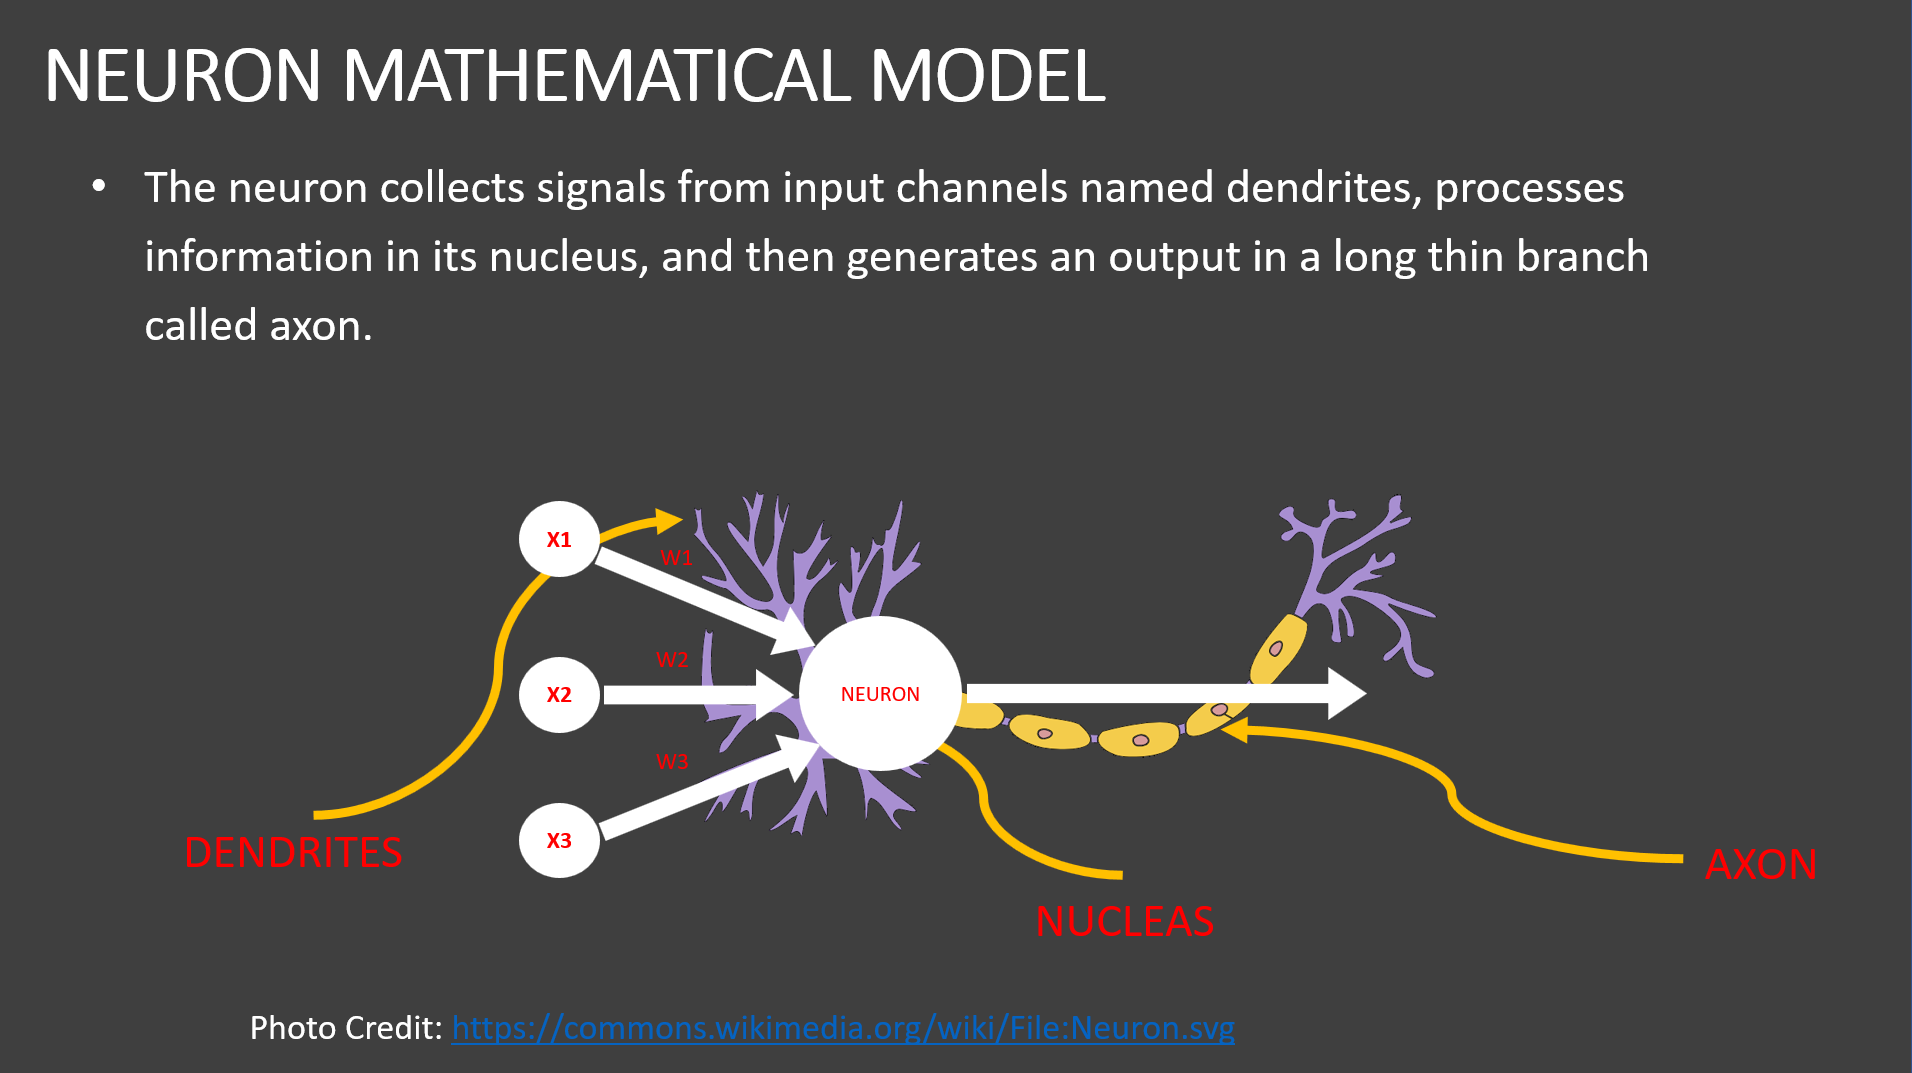

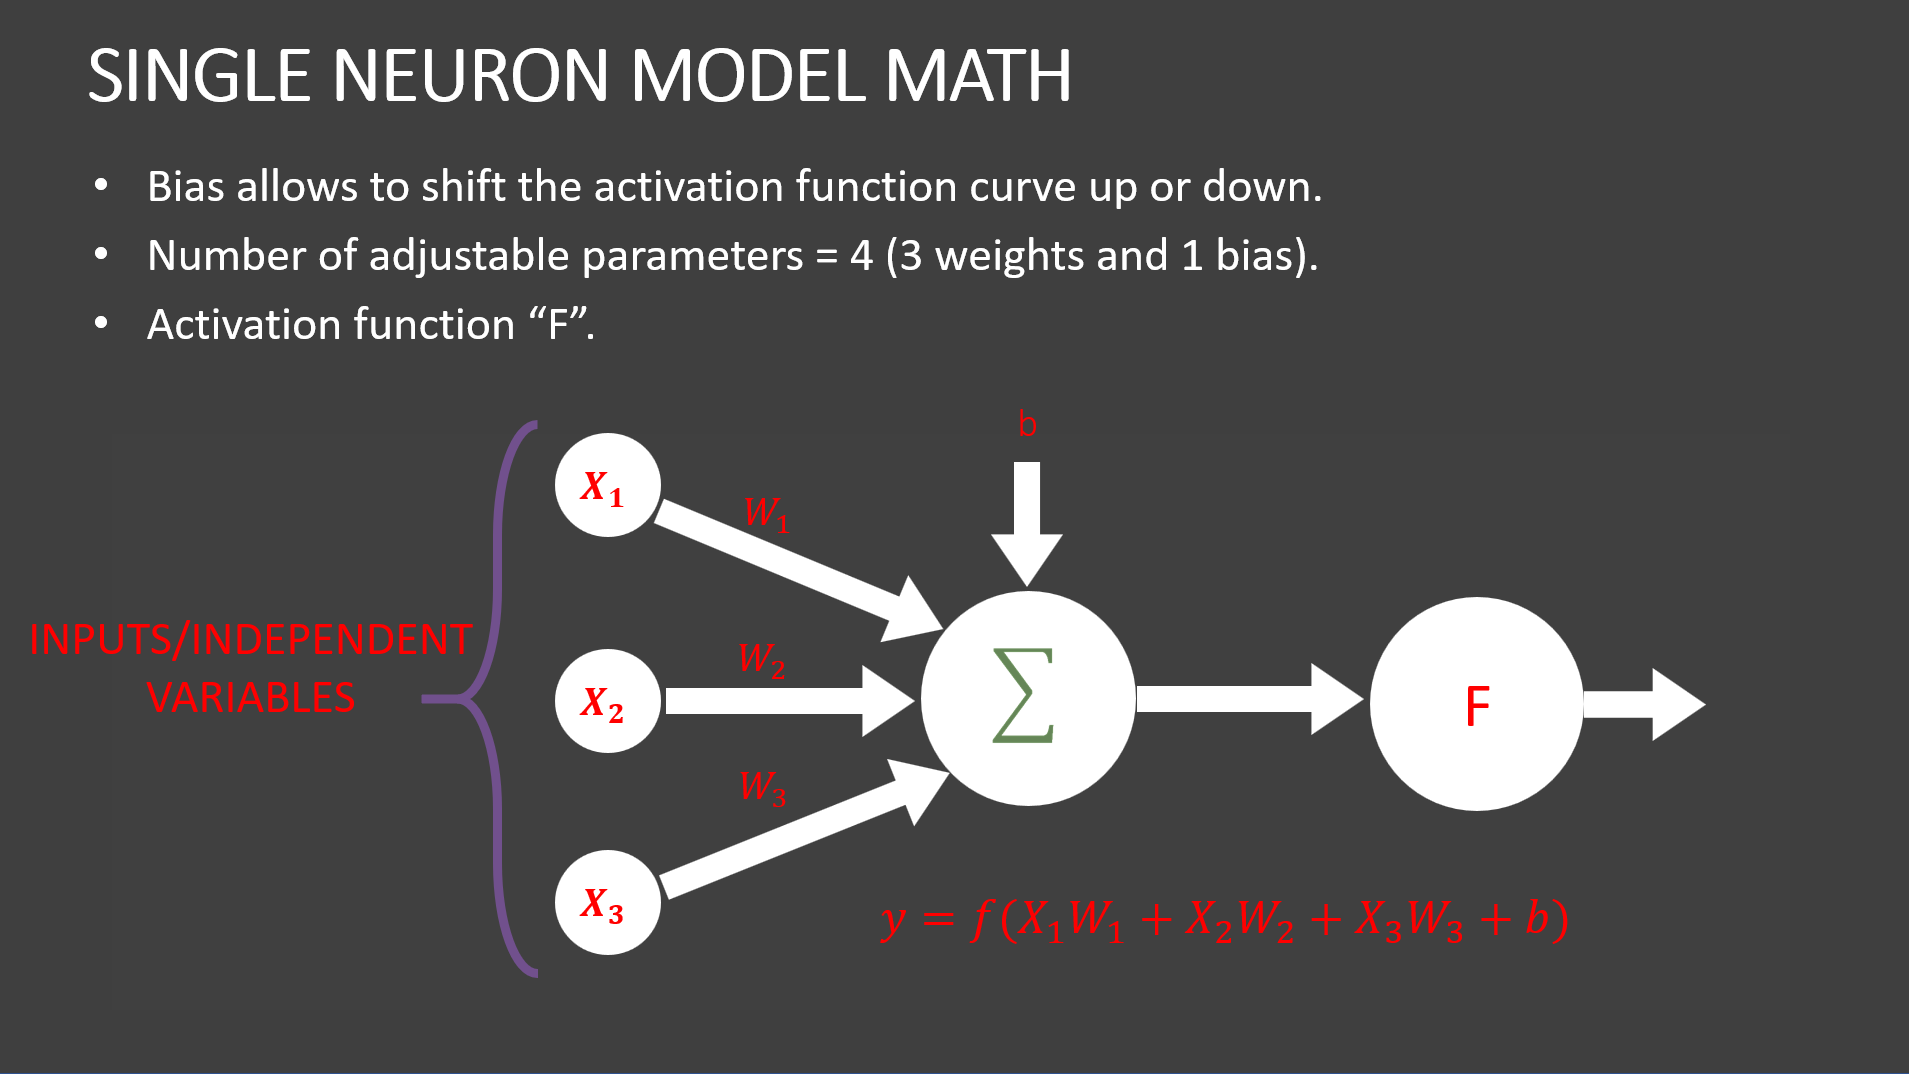

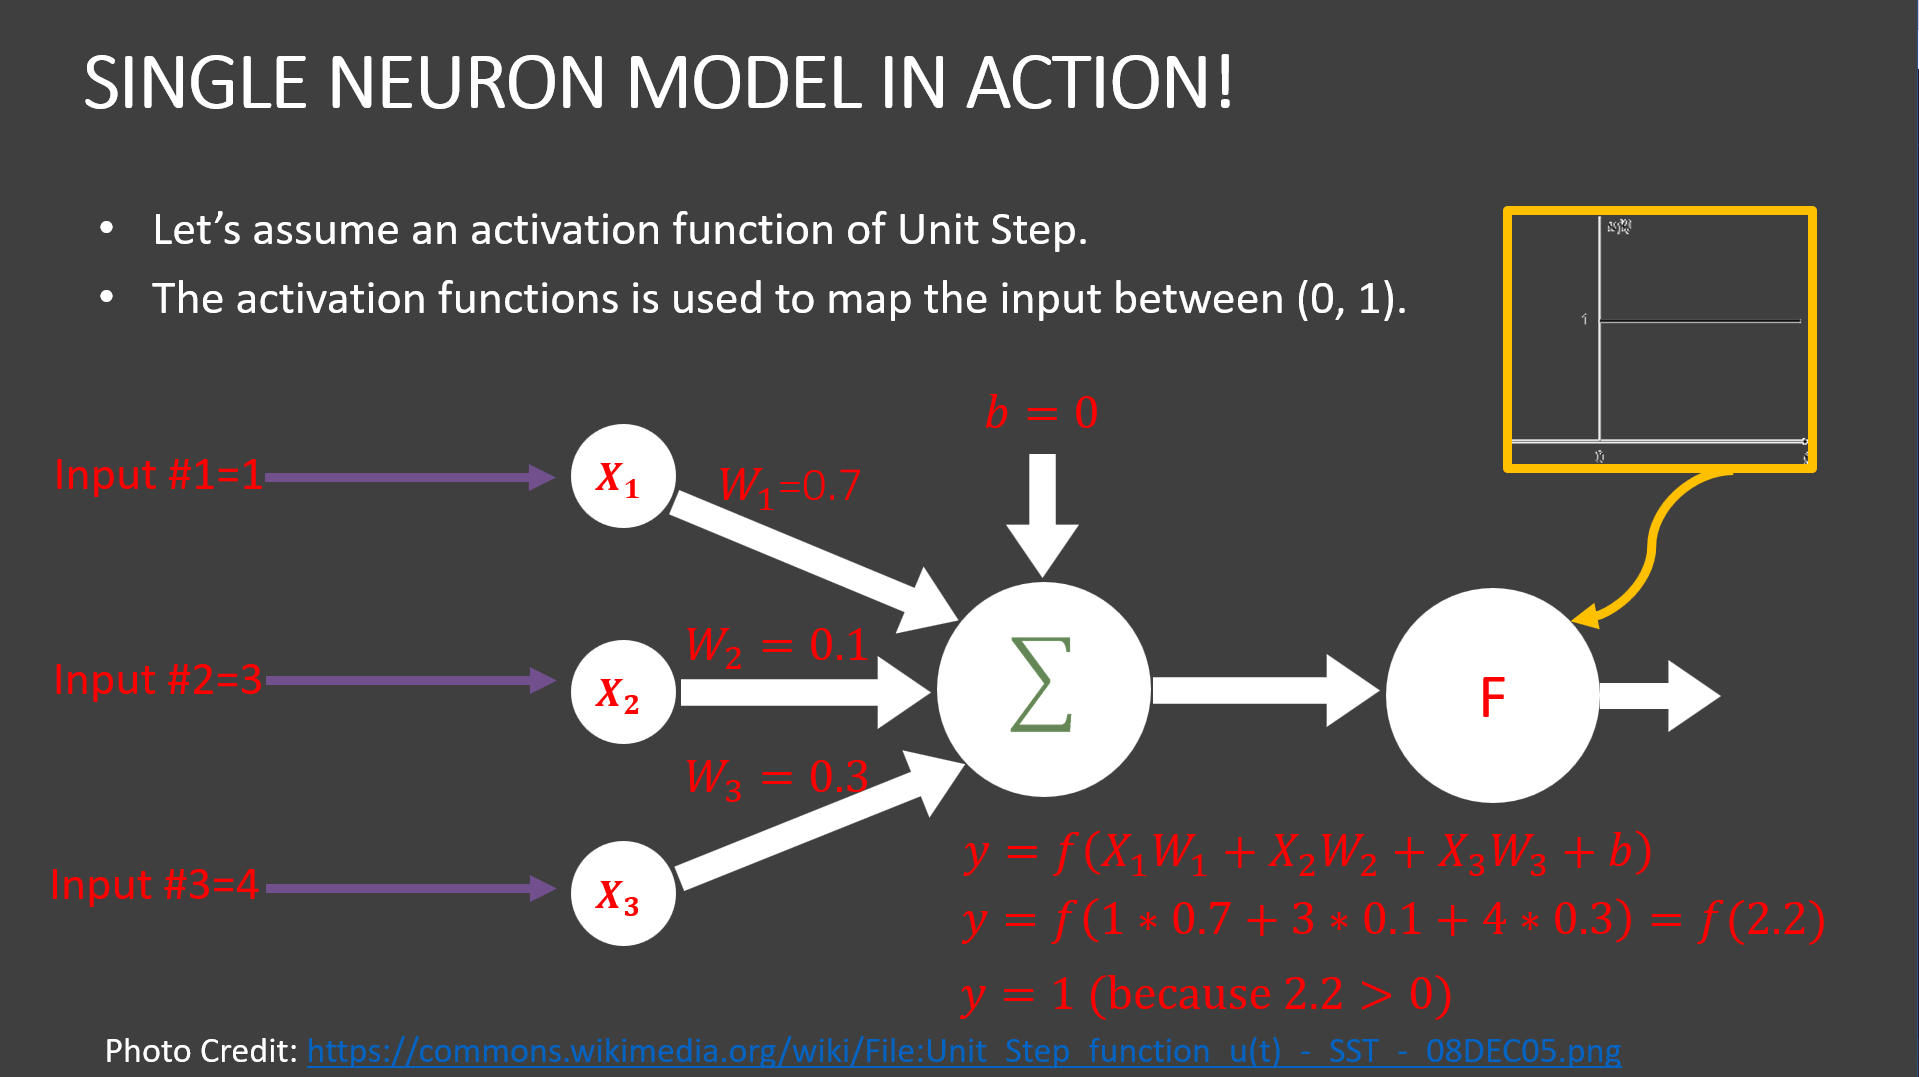

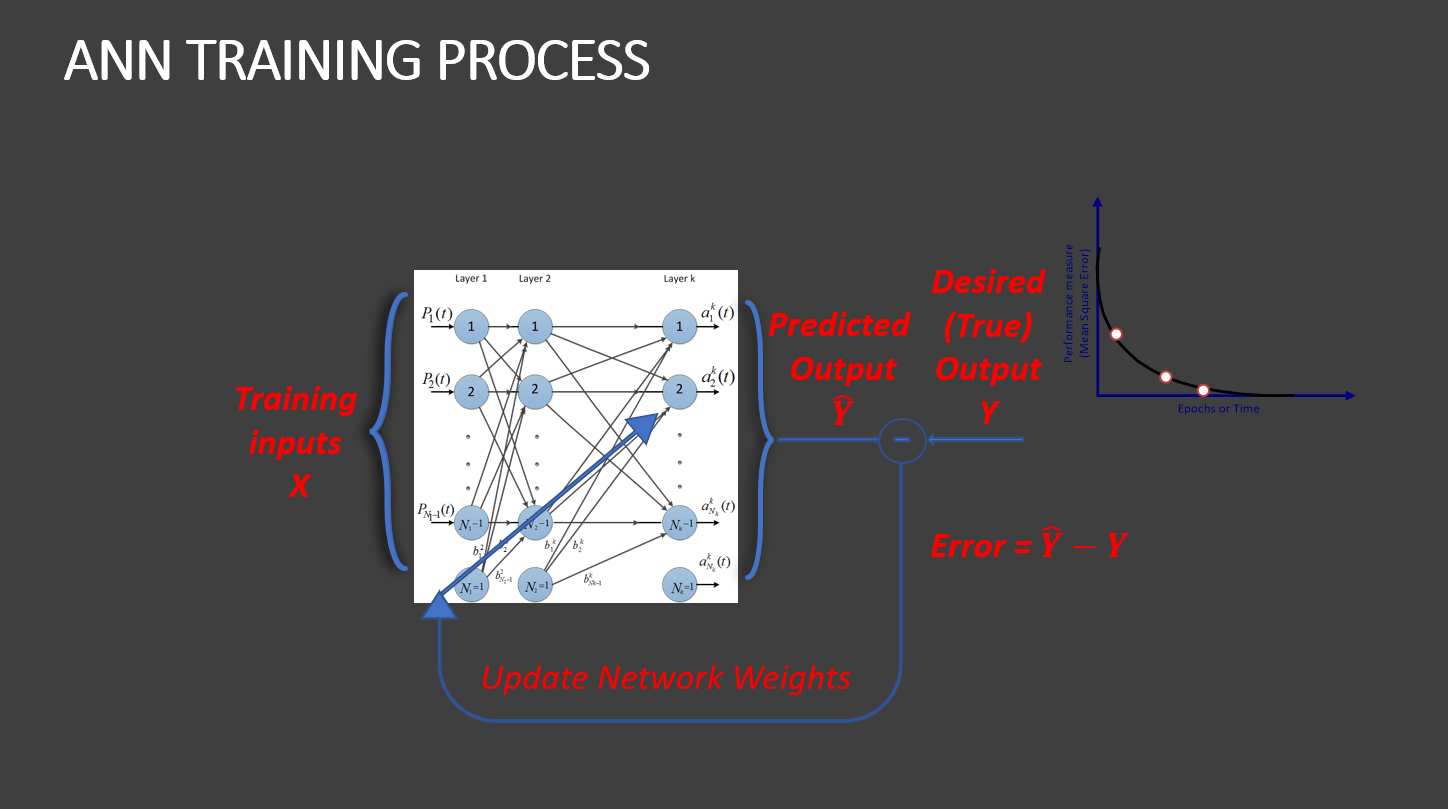

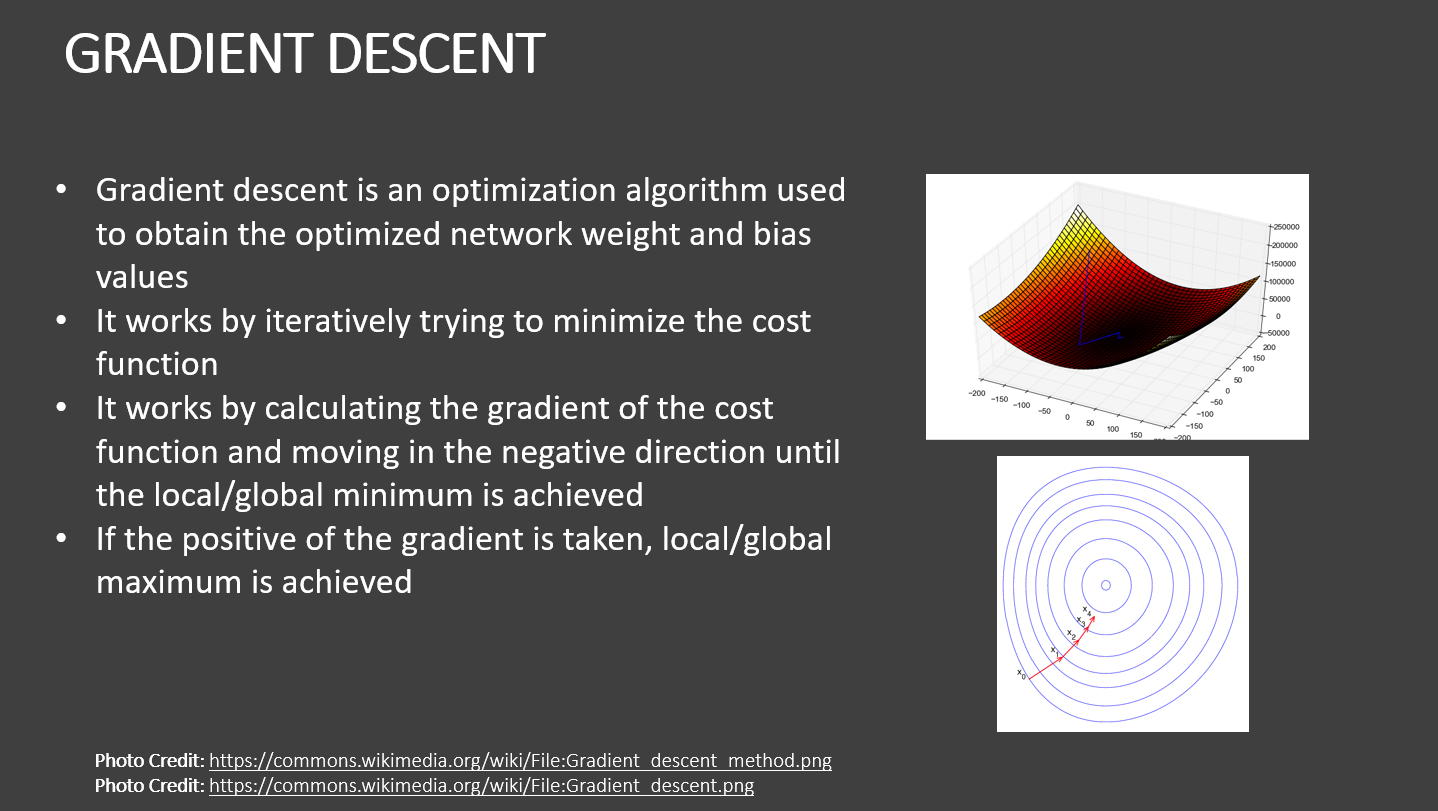

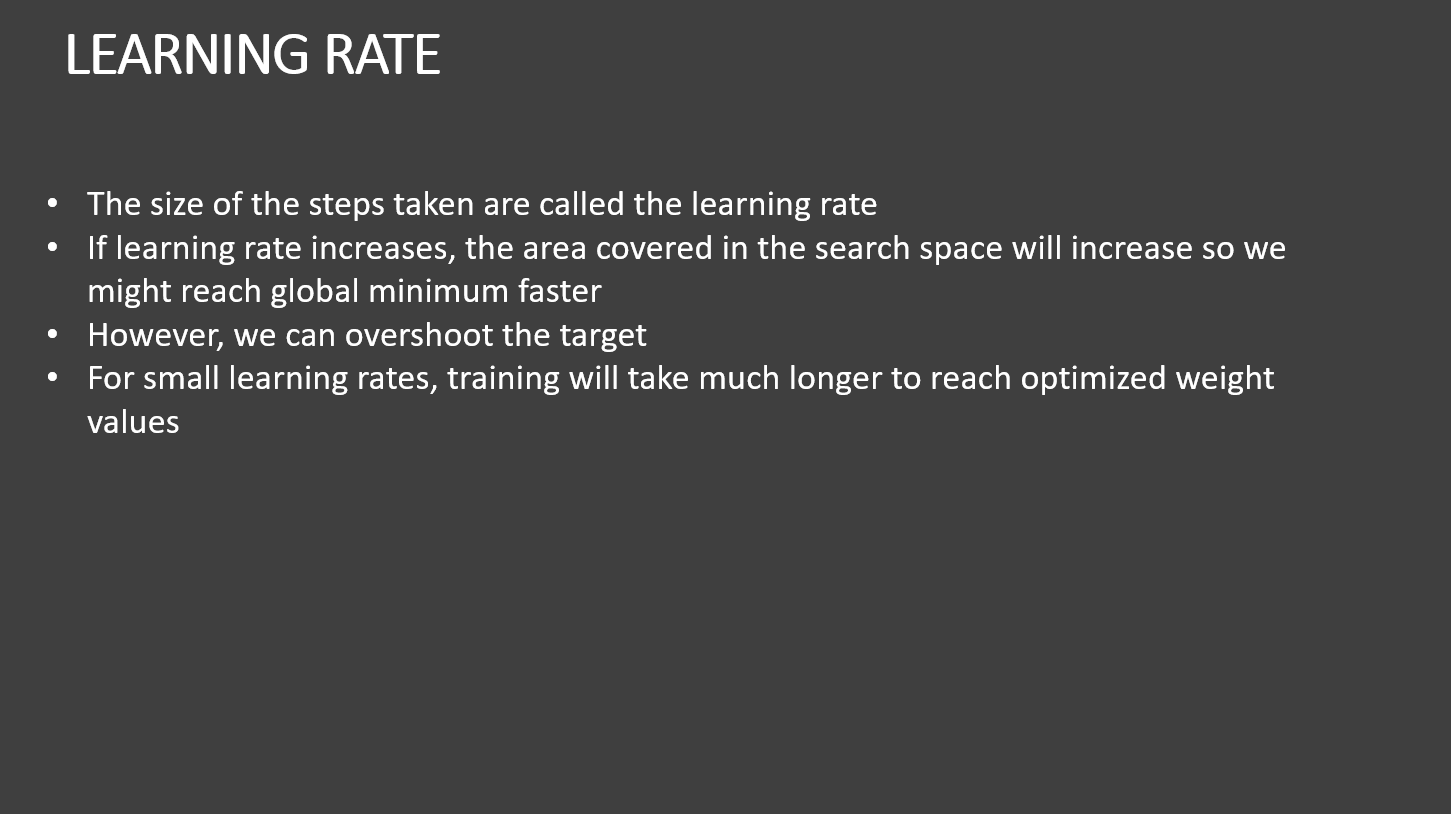

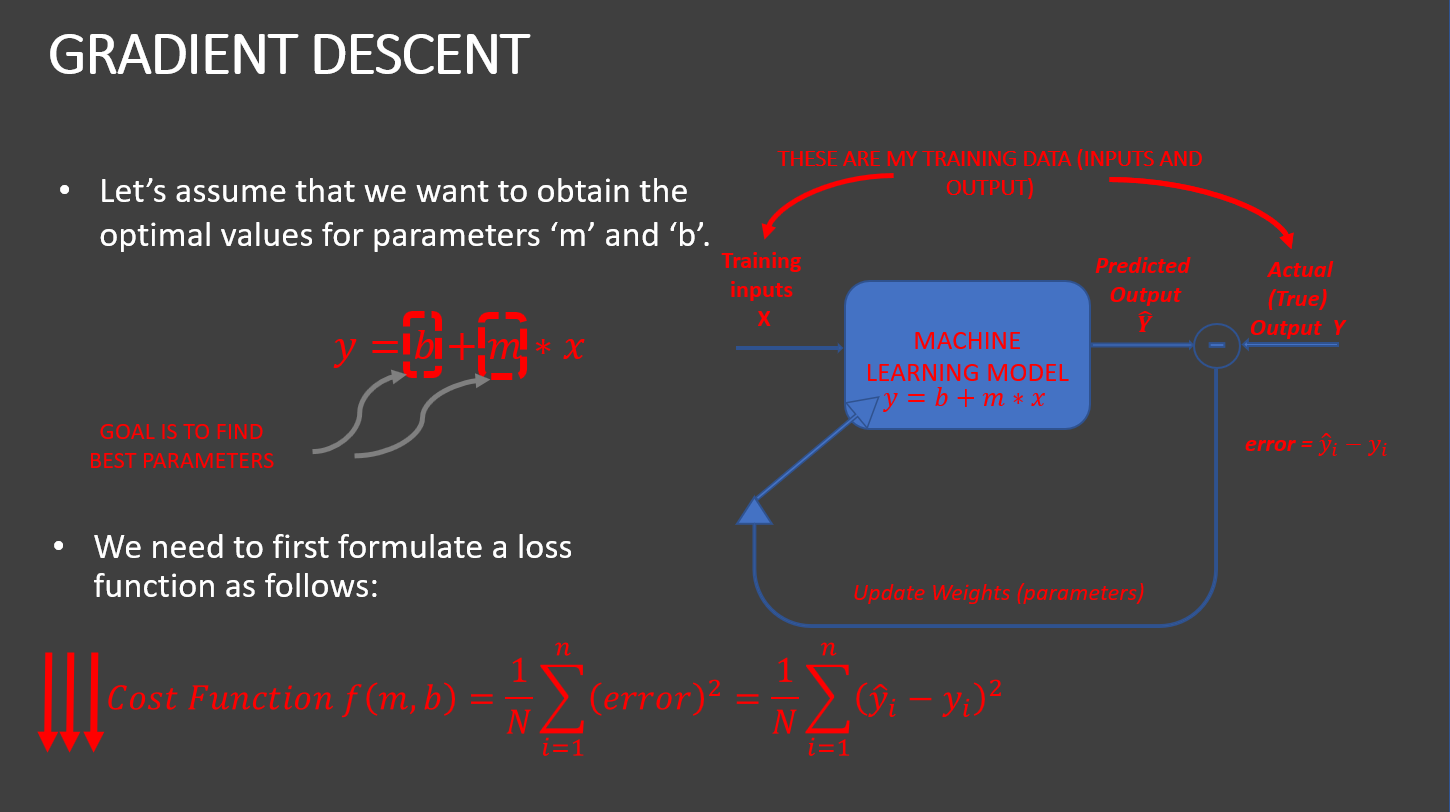

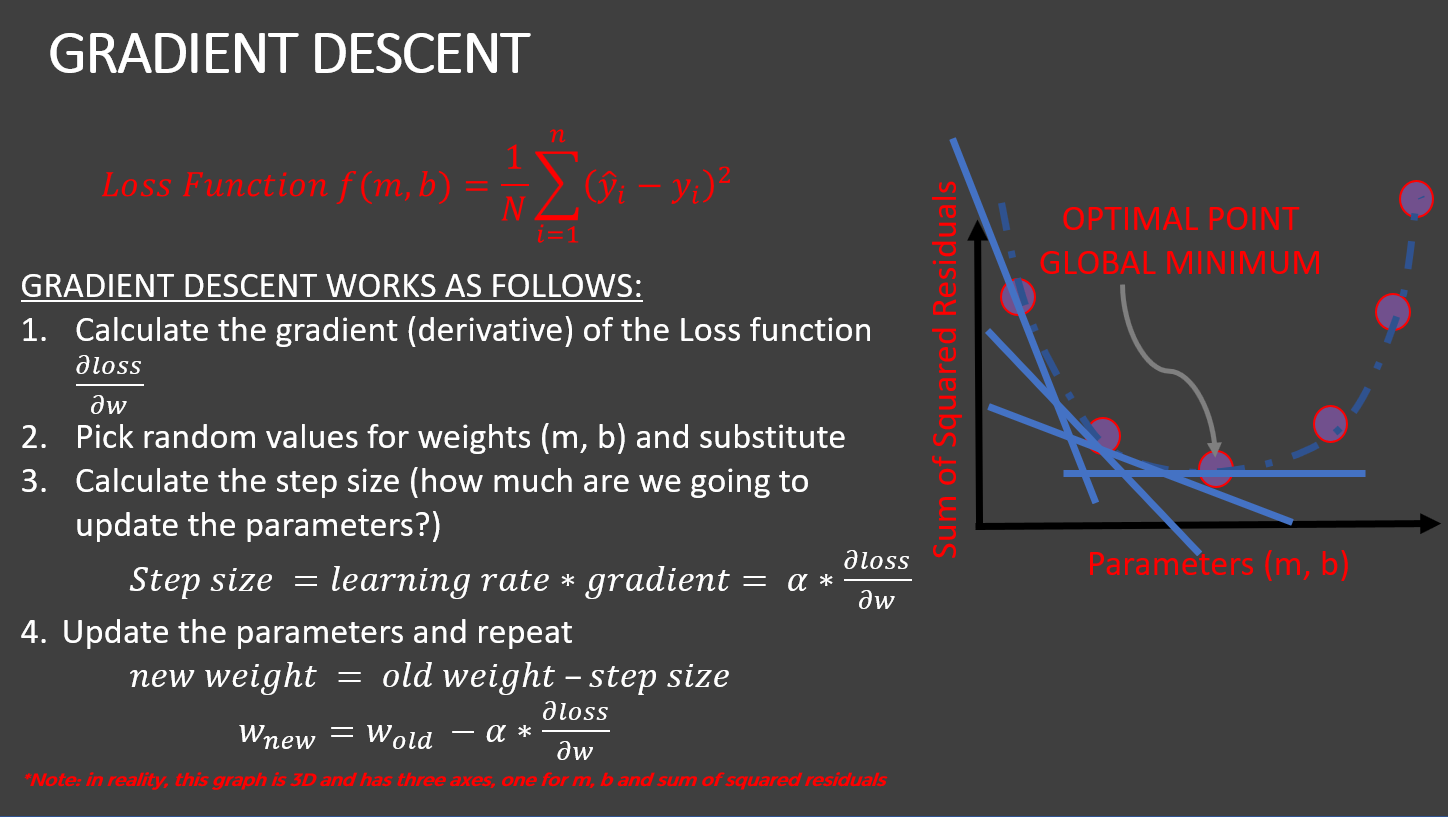

# TASK #7: BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [44]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation='linear'))

# ANN_model.add(Dropout(0.4))
# ANN_model.add(Dense(500, activation='linear'))

ANN_model.add(Dropout(0.4))


# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

MINI CHALLENGE #5:
- Create a new model with an additional Fully connected layer with 500 neurons and linear activation function
- Print out the model summary. Roughly, how many trainable parameters have been newly introduced?

# TASK #8: COMPILE AND TRAIN DEEP LEARNING MODEL

In [45]:
# Compile the model
ANN_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [46]:
history=ANN_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
88/88 [==============================] - 2s 14ms/step - loss: 0.1980 - accuracy: 0.9254 - val_loss: 0.1238 - val_accuracy: 0.9543
Epoch 2/20
88/88 [==============================] - 1s 11ms/step - loss: 0.1177 - accuracy: 0.9564 - val_loss: 0.0768 - val_accuracy: 0.9686
Epoch 3/20
88/88 [==============================] - 1s 11ms/step - loss: 0.0920 - accuracy: 0.9682 - val_loss: 0.0831 - val_accuracy: 0.9671
Epoch 4/20
88/88 [==============================] - 1s 11ms/step - loss: 0.0904 - accuracy: 0.9679 - val_loss: 0.0698 - val_accuracy: 0.9743
Epoch 5/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 0.0686 - val_accuracy: 0.9757
Epoch 6/20
88/88 [==============================] - 1s 14ms/step - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.0828 - val_accuracy: 0.9771
Epoch 7/20
88/88 [==============================] - 1s 14ms/step - loss: 0.0591 - accuracy: 0.9786 - val_loss: 0.0751 - val_accuracy: 0.9771
Epoch 8/20
88

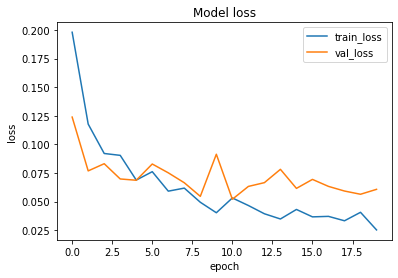

In [47]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

MINI CHALLENGE #6:
- Retrain the model using more number of epochs and a different validation datset

# TASK #9: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [48]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

47/47 [==============================] - 0s 4ms/step


In [49]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

47/47 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9787
Accuracy : 0.9786666631698608


In [50]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<AxesSubplot:>

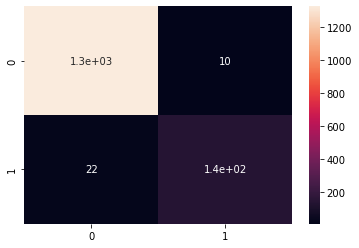

In [51]:
# Plot Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)

In [52]:
# Print out the classification report
from sklearn.metrics import classification_report
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1337
           1       0.93      0.87      0.90       163

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500

